<a href="https://colab.research.google.com/github/OgBasti/DataAnalysis/blob/main/RMBAproject_HRanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR Analytics Dataset**

## **Table of Contents**

- [1. Executive Summary](#1-Executive-summary)
- [2. Introduction](#2-Introduction)
  - [2.1 The Dataset](#21-The-Dataset)
  - [2.2 Research Question and Hypothesis](#22-Research-Question-and-Hypothesis)
- [3. Exploratory Data Analysis](#2-Exploratory-data-analysis)
  - [3.1 Importing and Cleaning the Dataset](#31-Importing-and-cleaning-the-dataset)
  - [3.2 Types of Variables in the Dataset](#32-Types-of-Variables-in-the-Dataset)
    - [3.2.1 Qualitative Variables](#321-Qualitative-Variables)
    - [3.2.2 Quantitative Variables](#322-Quantitative-Variables)
  - [3.3 Descriptive Analysis](#33-Descriptive-analysis)
- [4. Method 1: Multiple Linear Regression](#4-Method-1:-Multiple-Linear-Regression)
  - [4.1 Model](#42-Model)
  - [4.2 Assumptions](#41-Assumptions)
    - [4.2.1 Linearity](#421-Linearity)
    - [4.2.2 Homoscedasticity](#422-Homoscedassticity)
    - [4.2.3 Normality of residuals](#423-Normality-of-residuals)
    - [4.2.4 Multicollinearity](#424-Multicollinearity)
    - [4.2.5 Independence of errors](#425-Independence-of-errors)
  - [4.3 Findings](#43-Findings)
  - [4.4 Refined Model](#44-Refined-Model)
    - [4.4.1 Assumptions check](#441-Assumption-check)
  - [4.5 Results Analysis](#45-Results-Analysis)
- [5. Method 2: Logistic Regression](#5-Method-2:-Logistic-Regression)
  - [5.1 Model](#51-Model)
  - [5.2 Interpretation](#52-Interpretation)
    - [5.2.1 Goodness-of-fit](#521Goodness-of-fit)
    - [5.2.2 Hypothesis testing](#522-Hypothesis-Testing)
  - [5.3 Results Analysis](#53-Results-Analysis)
- [6. Conclusion](#6-Conclusion)
- [7. References](#7-References)


## **1. Executive Summary**

This analysis investigates the relationship between employee satisfaction levels and two key retention metrics in the workplace: employee tenure and the likelihood of attrition. Utilizing the HR Employee Attrition dataset, which contains detailed information on 1,470 employees across 35 variables—spanning demographic data, job characteristics, compensation, and various satisfaction metrics—our objective is to better understand the factors that influence employee retention.

The question guiding our research is: How do employee satisfaction levels affect employee tenure and likelihood of attrition? To address this, we applied two statistical models: a multiple linear regression to explore the impact of satisfaction variables on employee tenure, and a logistic regression to assess their influence on attrition. Satisfaction variables include measures such as work-life balance, job involvement, environment satisfaction, and others, believed to affect retention outcomes.

The multiple linear regression model yielded inconclusive results regarding employee tenure. Initially, none of the satisfaction variables were found to be statistically significant, and the model performed poorly, as indicated by a negative adjusted R-squared value of -0.002. Including the variable *MonthlyIncome* as an additional predictor improved the model’s fit, highlighting income as a significant determinant of tenure. Nevertheless, satisfaction variables did not significantly contribute to explaining employee tenure, and key model assumptions were violated. Thus, we conclude that employee satisfaction alone is insufficient to predict tenure, suggesting the need for more complex modeling or additional factors to explain this relationship.

Conversely, the logistic regression analysis provided stronger insights into the factors influencing employee attrition. Four out of the five satisfaction measures—*JobSatisfaction, WorkLifeBalance, EnvironmentSatisfaction, and JobInvolvement*—were significant predictors of attrition (p < 0.05). Higher levels of satisfaction in these areas were associated with a decreased likelihood of attrition. Notably, *RelationshipSatisfaction* did not significantly predict attrition in our dataset (p = 0.131).

In summary, while employee satisfaction variables failed to meaningfully predict the length of tenure, they emerged as important determinants of the likelihood of employee attrition. Employees' satisfaction with the work environment, job contentment, and work-life balance, in particular, reduced the odds of them leaving. This suggests that organizations seeking to improve retention should focus on enhancing these specific satisfaction areas. However, future research should incorporate additional factors, such as compensation, external job opportunities, and job performance, to capture the complexities of employee retention dynamics.

## **2. Introduction**

 ### **2.1 The Dataset**

HR analytics involves the analysis of organizational data to uncover trends related to employees, empowering HR departments to make strategic, data-driven decisions that improve efficiency and enhance profitability. In fact, by leveraging data insights, organizations can proactively address employee concerns, optimize talent management, and ultimately foster a more productive workplace.

The chosen dataset is the *HR Employee Attrition* dataset. It comprises detailed information on the employees of an organization, capturing both personal and job-related attributes that could potentially influence their decision to stay or leave. The dataset includes 1,470 records, each representing an individual employee, and consists of 35 variables that cover demographic details, job characteristics, compensation, and job satisfaction metrics. The diversity of the dataset allows for a nuanced examination of the relationships between employee satisfaction levels and retention outcomes. However, it is important to acknowledge that while the dataset is robust, it may contain limitations, such as potential biases in self-reported satisfaction measures and the absence of external factors that could influence attrition beyond the organization.

Below is an overview of the variables in the dataset:

***Employee Demographics:***
*   **Age:** Represents the age of the employee.
*   **Gender:** Categorical variable indicating whether the employee is male or female, providing insight into gender-related trends in attrition and tenure.

***Job-Related Variables:***

*   **Department:** The department where the employee is currently working (e.g., Sales, Research & Development, Human Resources). Certain departments may have distinct patterns in tenure and turnover rates.
*   **JobRole:** The specific role or designation of the employee within their department (e.g., Sales Executive, Laboratory Technician).
* **JobLevel:** The hierarchical level of the employee within the organization, ranging from 1 (entry-level) to 5 (executive-level). Seniority and responsibility can impact tenure and likelihood of leaving.
*   **BusinessTravel:** Indicates the frequency of business travel required for the job (e.g., Rarely, Frequently), which may influence employee satisfaction and attrition rates.
* **YearsAtCompany:** The number of years the employee has been with the organization, which serves as a direct measure of tenure.

***Compensation:***

* **MonthlyIncome:** The monthly salary of the employee, which can provide insight into compensation’s role in retention.
* **PercentSalaryHike:** The percentage increase in salary in the last year. Employees who perceive they are not adequately rewarded for their efforts may be more likely to leave.
* **OverTime:** Indicates whether an employee frequently works overtime (Yes/No). Excessive overtime may lead to burnout and increased likelihood of attrition

***Job Satisfaction and Work Environment:***

* **JobSatisfaction:** Measures the level of satisfaction an employee has with their job, with values ranging from 1 (Low) to 4 (Very High). This variable is crucial for understanding how job contentment influences an employee’s likelihood of leaving.
* **WorkLifeBalance:** Assesses how well the employee’s work and personal life are balanced, ranging from 1 (Bad) to 4 (Best).Poor work-life balance may increase the likelihood of attrition.
* **EnvironmentSatisfaction:** Gauges the employee’s satisfaction with the work environment, such as office facilities and general work conditions, ranging from 1 (low) to 4 (Very High). An unfavorable work environment may contribute to increased attrition rates.
* **RelationshipSatisfaction:** Measures the level of satisfaction with relationships at work, ranging from 1 (Low) to 4 (Very High). Poor relationships with colleagues or managers can negatively impact retention.
* **JobInvolvement:** Measures the degree to which an employee is involved with their job, ranging from 1 (Low) to 4 (Very High). Low job involvement might lead to lower satisfaction and higher attrition.

***Attrition Indicator:***

* **Attrition:** A critical variable indicating whether an employee has left the organization or not. This is a binary variable with "Yes" signifying that the employee has left and "No" indicating they are still with the company. Understanding which factors contribute to 'Yes' responses will be crucial in developing strategies for improving retention.”

***Other Variables:***

* **DistanceFromHome:** The distance between the employee’s home and the workplace, which may affect their satisfaction and likelihood to stay.
* **TrainingTimesLastYear:** The number of times the employee has participated in training programs in the last year.
* **YearsSinceLastPromotion:** The number of years since the employee’s last promotion, which can impact their engagement and motivation levels.


### **2.2 Research Question and Hypothesis**

One of the primary challenges facing organizations today is not only managing human resources but also ensuring employee satisfaction and retention (Irabor & Okolie, 2019). Securing and retaining a skilled workforce is crucial, as employee knowledge and expertise have become essential components for achieving competitive advantage. Understanding the factors that influence staff retention and identifying ways to improve it can help organizations mitigate the negative impact of high employee turnover (Irabor & Okolie, 2019).

Precisely measuring the satisfaction an individual derives from their work is difficult as numerous factors directly or indirectly influence employee satisfaction in the workplace. The  Employee Attrition dataset used in this research captures various aspects of employee satisfaction, including work environment, relationships with colleagues, and overall job satisfaction. Organizations that create environments that attract, motivate, and retain skilled employees are better positioned to thrive in today's competitive business landscape, where quality and cost-efficiency are key (Gupta & Kristensen, 2008).  A positive working environment is just as important for employee health as socioeconomic status. Hence, investing in creating a satisfying work environment could be a cost-effective method for improving employee health (Gupta & Kristensen, 2008).

Therefore, this paper aims to examine the factors that influence employee's tenure, providing insights that will help informed decision-making and formulate better retention strategies. The research question guiding this analysis is **How do employee satisfaction levels affect employee tenure and likelihood of attrition?**

To address this research question, the following hypothesis have beed formulated.


**Hypothesis 1:**

**H0₁**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have no significant impact on the duration of an employee's tenure.

**HA₁**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have a significant impact on the duration of an employee's tenure.

To test this hypothesis we will perform a **multiple linear regression**. The predictor variables are *work-life balance*, *work environment satisfaction*, *job satisfaction*, *job involvement* and *relationship satisfaction*. The response variable is the years an employee spent at the company (*YearsAtCompany*)

**Hypothesis 2:**

**H0₂**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have no significant effect on the likelihood of employee attrition.

**HA₂**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have a significant effect on the likelihood of employee attrition.

To test this hypothesis we will perform a **multiple logistic regression**. The predictor variables are *work-life balance*, *work environment satisfaction*, *job satisfaction*, *job involvement* and *relationship satisfaction*. The response variable is the likelihood of *attrition*.


## **3. Exploratory Analysis**

In this section, we conduct an Exploratory Data Analysis (EDA) to examine key variables in the dataset, uncover patterns, and reach a deep understanding of key variables. We will begin by importing and cleaning the dataset, followed by an exploration of the dataset's structure and a presentation of summary statistics, visualizations, and correlation analyse.

### **3.1 Importing and Cleaning the Dataset**

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

#setting display options for DataFrames
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)
pd.set_option("display.float_format", "{:.2f}".format)

In [ ]:

#importing the dataset
dataset = pd.read_csv('HR-Employee-Attrition.csv', encoding='latin1')

In [ ]:
#get an overview of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ï»¿Age                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#rename the Age column
dataset.rename(columns={
    'ï»¿Age': 'Age',
}, inplace=True)

#renaming variables
#dataset['Department'] = dataset['Department'].replace('Research & Development', 'Research and Development')
dataset["BusinessTravel"] = dataset["BusinessTravel"].replace('Travel_Rarely', 'Travel Rarely')
dataset["BusinessTravel"] = dataset["BusinessTravel"].replace('Travel_Frequently', 'Travel Frequently')


dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
#create a copy of the dataset to work with
df = dataset.copy()

**Exploring Unique values to assess variable type**

In [ ]:
#exploring unique values to develop first overview of variables
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [ ]:
# droping the columns that only have one unique value
print(df["EmployeeCount"].unique()) #Employee Count = 1 for every observations
print(df["Over18"].unique()) #All employees are over 18
print(df["StandardHours"].unique()) #All employees have the same standard hours (80)


#drop Employee Count, Over 18, Standard Hours and EmployeeNumber
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1)

[1]
['Y']
[80]


The variables *EmployeeCount*, *Over18* and *StandardHours* have the same value for all of the observations. Hence, all observations in the dataset capture one employee only, all employees are above the age of 18 and work the same amount of hours.

**Heatmap of Missing Data**

Before diving into data analysis, it's crucial to understand the completeness of the dataset. Missing data can influence results and lead to incorrect conclusions if not handled properly

<Axes: >

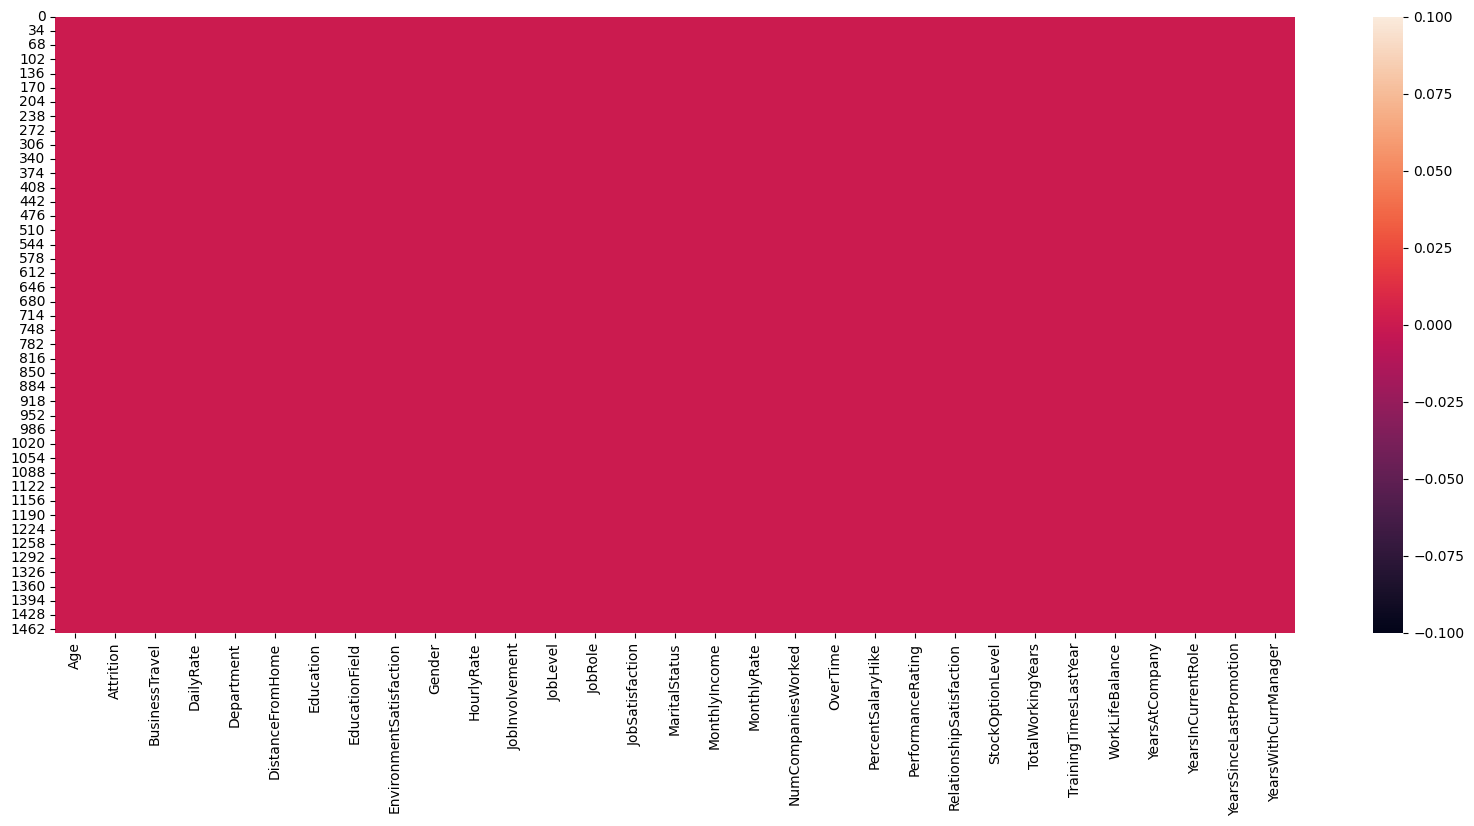

In [ ]:
#plotting the missing data as a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isna())

The Dataset contains no missing values.

### **3.2 Types of variables in the dataset**

In [ ]:
# Variable types
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
Gender,object


The dataset includes a mix of quantitative and qualitative variables that provide a comprehensive view of employee attributes. This diverse set of variables is well-suited for analyzing the factors that impact employee tenure and attrition. Let's now dive deeper into the different variable types.

#### **3.2.1 Qualitative variables**

*Categorical Variables*

In [ ]:
#overview of categorical variables
object_col = []
for column in df.columns:
    if df[column].dtype == object:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("--------------------------------------------------------------------------")

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------------------------------
BusinessTravel : ['Travel Rarely' 'Travel Frequently' 'Non-Travel']
BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------

The qualitative analysis shows that most employees are in Research & Development, travel rarely for work, are predominantly male, and do not work overtime. Further analysis is required to determine how these factors relate to attrition rate.

#### **3.2.2 Quantitative Variables**

*Discrete Variables*

In [ ]:
#overview of discrete variables
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("--------------------------------------------------------------------------")


DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
--------------------------------------------------------------------------
Education : [2 1 4 3 5]
--------------------------------------------------------------------------
EnvironmentSatisfaction : [2 3 4 1]
--------------------------------------------------------------------------
JobInvolvement : [3 2 4 1]
--------------------------------------------------------------------------
JobLevel : [2 1 3 4 5]
--------------------------------------------------------------------------
JobSatisfaction : [4 2 3 1]
--------------------------------------------------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
--------------------------------------------------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
--------------------------------------------------------------------------
PerformanceRating : [3 4]
-----------------

The analysis of discrete variables reveals variability in employee experiences and career progression. Indeed, factors like *YearsInCurrentRole*, *YearsSinceLastPromotion*, and *YearsWithCurrManager* display a broad range, indicating diverse career paths. Satisfaction measures like JobSatisfaction and RelationshipSatisfaction have values from 1 to 4, showing differing levels of contentment. Additionally, variables like NumCompaniesWorked and TrainingTimesLastYear highlight differences in career stability and training frequency across the workforce.

*Continuous Variables*

In [ ]:
#Overview of continuous variables
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}, range: {df[column].max() - df[column].min()}")
        cont_col.append(column)
        print("--------------------------------------------------------------------------")

Age : Minimum: 18, Maximum: 60, range: 42
--------------------------------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499, range: 1397
--------------------------------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100, range: 70
--------------------------------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999, range: 18990
--------------------------------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999, range: 24905
--------------------------------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40, range: 40
--------------------------------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40, range: 40
--------------------------------------------------------------------------


The continuous variables show a diverse workforce with a broad range of ages, significant variation in compensation, as well as differing levels of tenure, highlighting considerable differences in employee experience, compensation, and career stages within the organization.

### **3.3 Descriptive Analysis**

In [ ]:
# Dataset statistical overview
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00



The statistics summary shows that the average employee is 37 years old with a tenure of 7 years. Monthly income varies significantly, with a mean of 6'503 USD, ranging from 1'009 USD to 19'999 USD. Job satisfaction, work-life balance, and environment satisfaction are moderate, with average ratings around 2.7 out of 4. The number of companies worked at averages at around 3, indicating that many employees have prior experience. These variations suggest diverse employee profiles and provide a solid foundation for exploring the factors affecting attrition and tenure.

The summary statistics show a moderate level of satisfaction across all metrics, with mean scores varying between 2.71 and 2.76 (for *RelationshipSatisfaction* and *WorkLifeBalance*, respectively). This suggests that there is potential for improving employee satisfaction. Furthermore, the variability in satisfaction scores, as indicated by the standard deviations, highlights that employee experiences differ within the organization.

In order to develop further insights on variables and their distribution, box plots and histograms are graphed and discussed below.

##### **Frequencies**


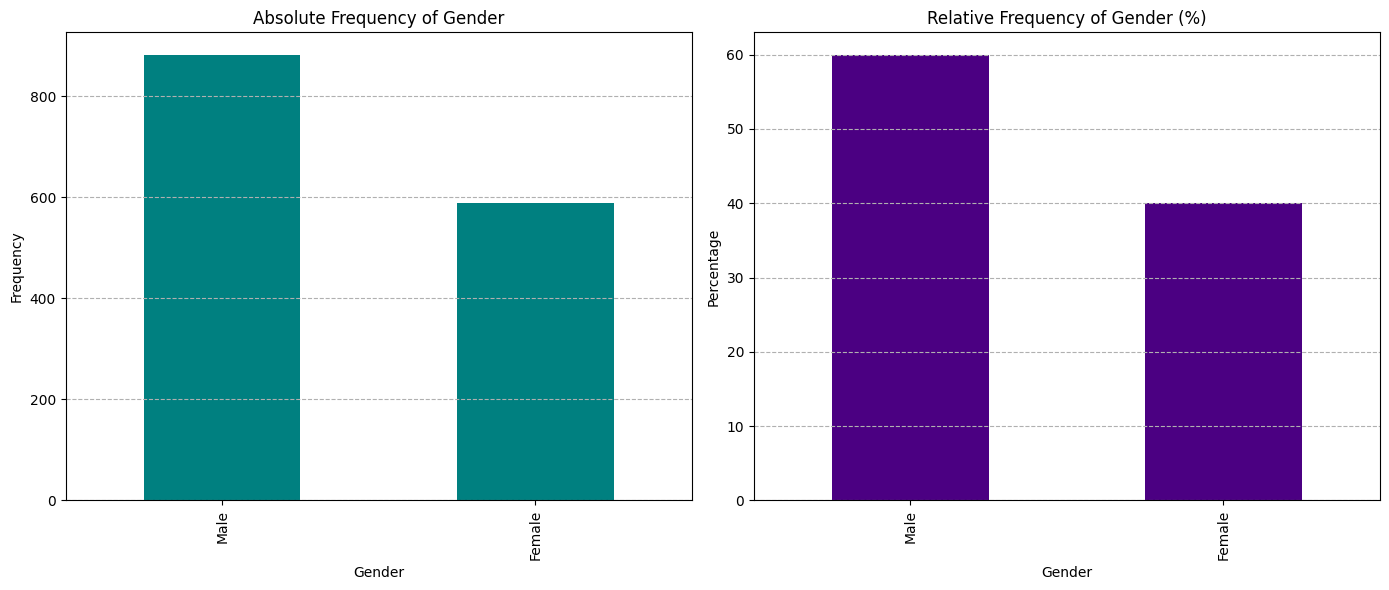

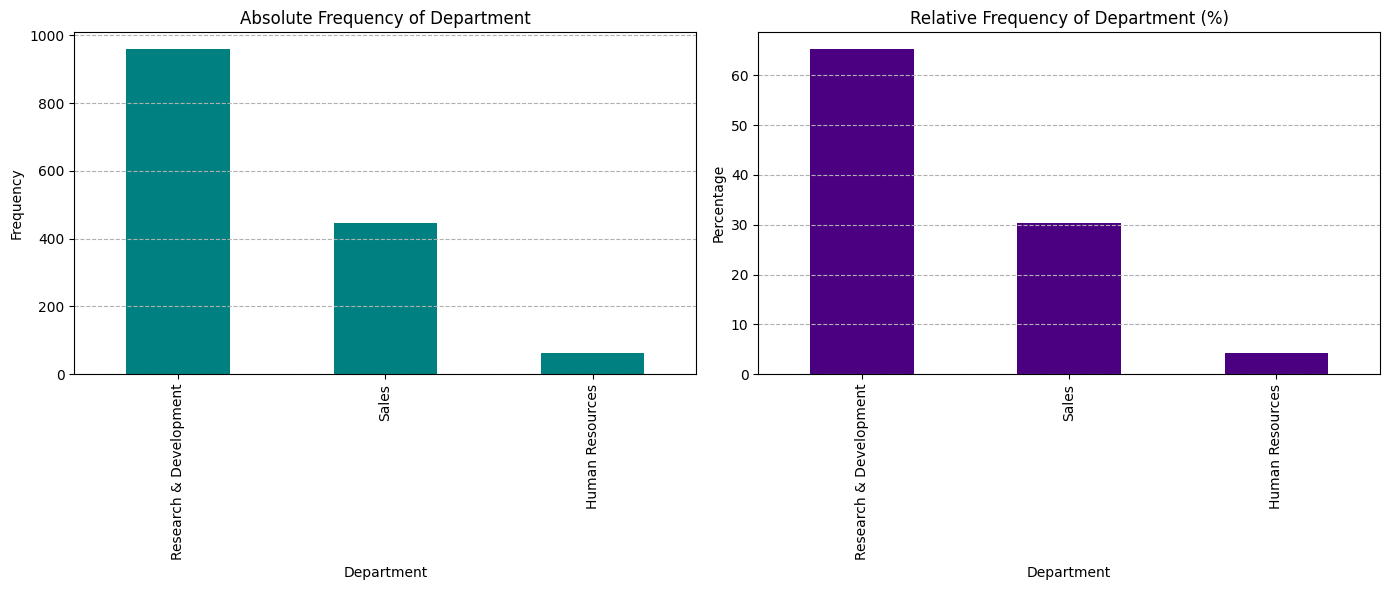

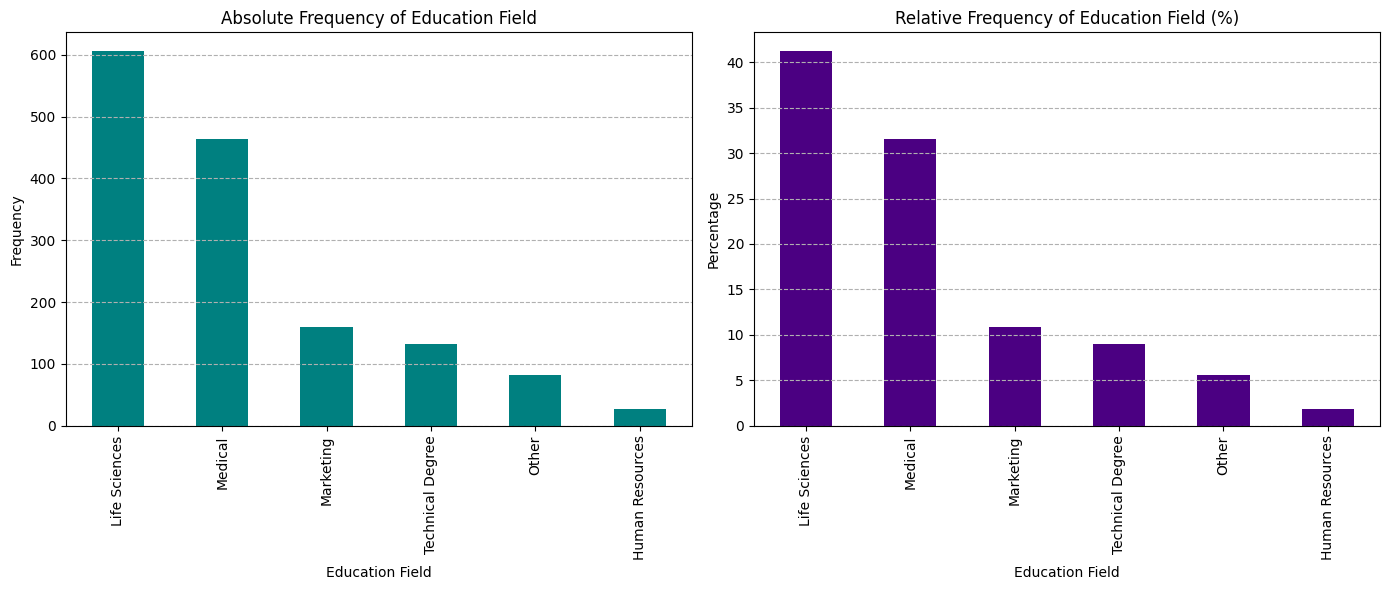

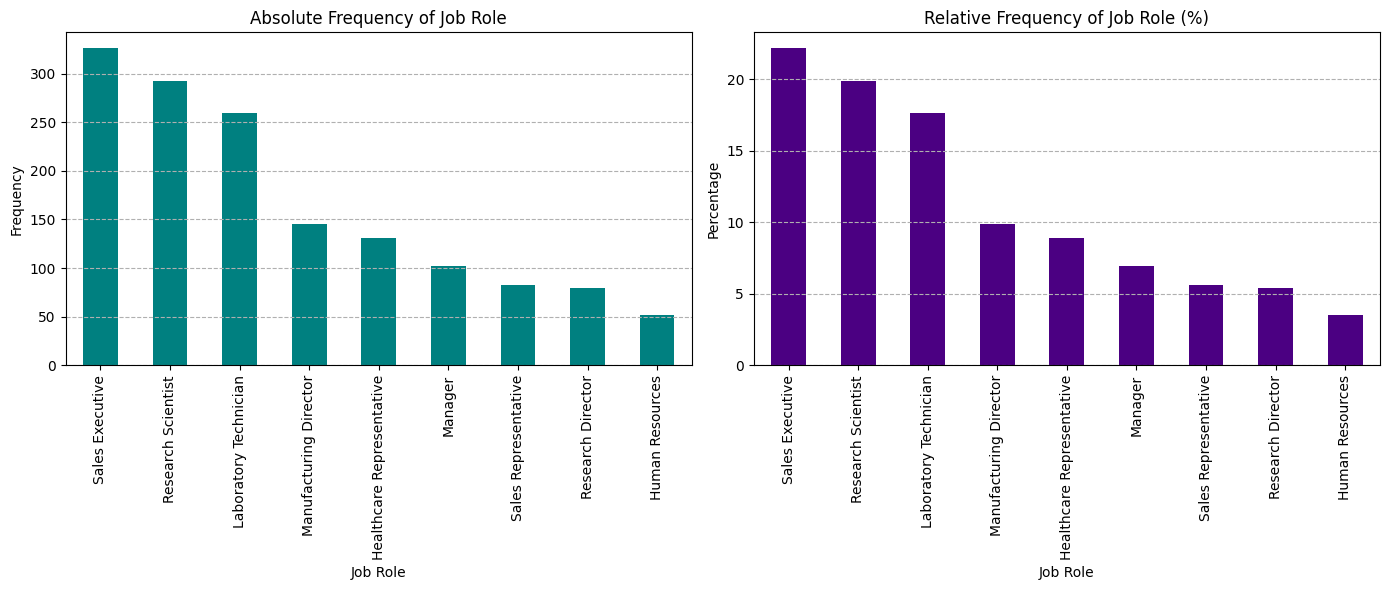

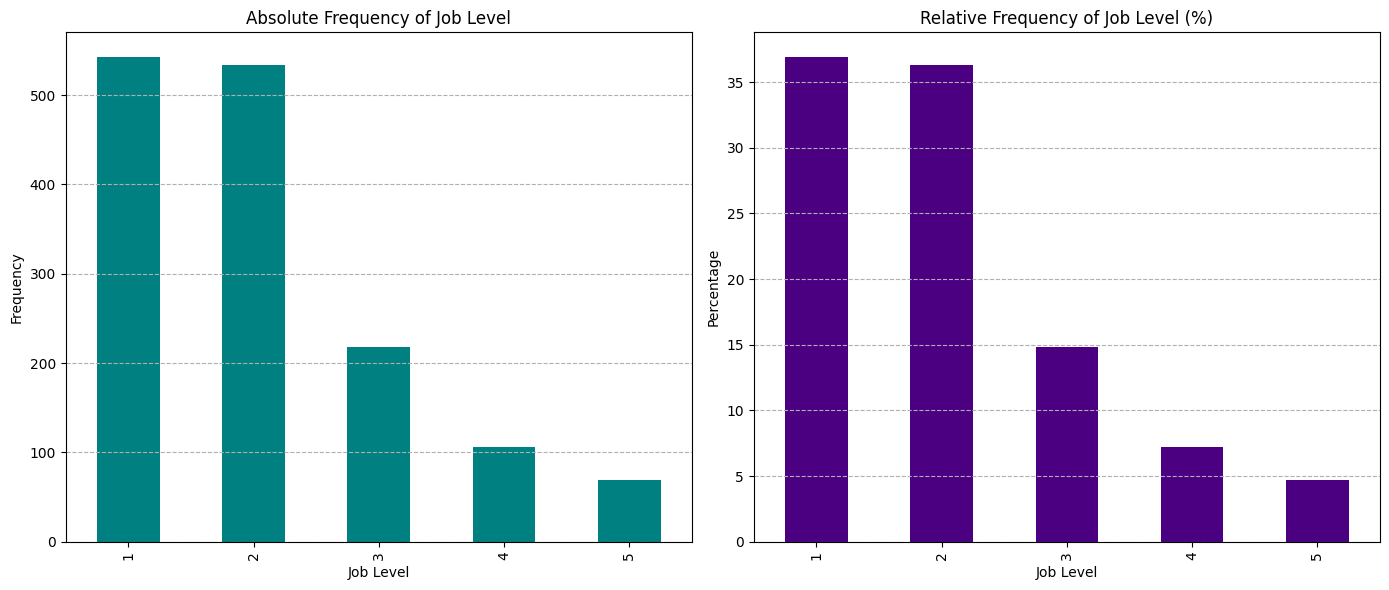

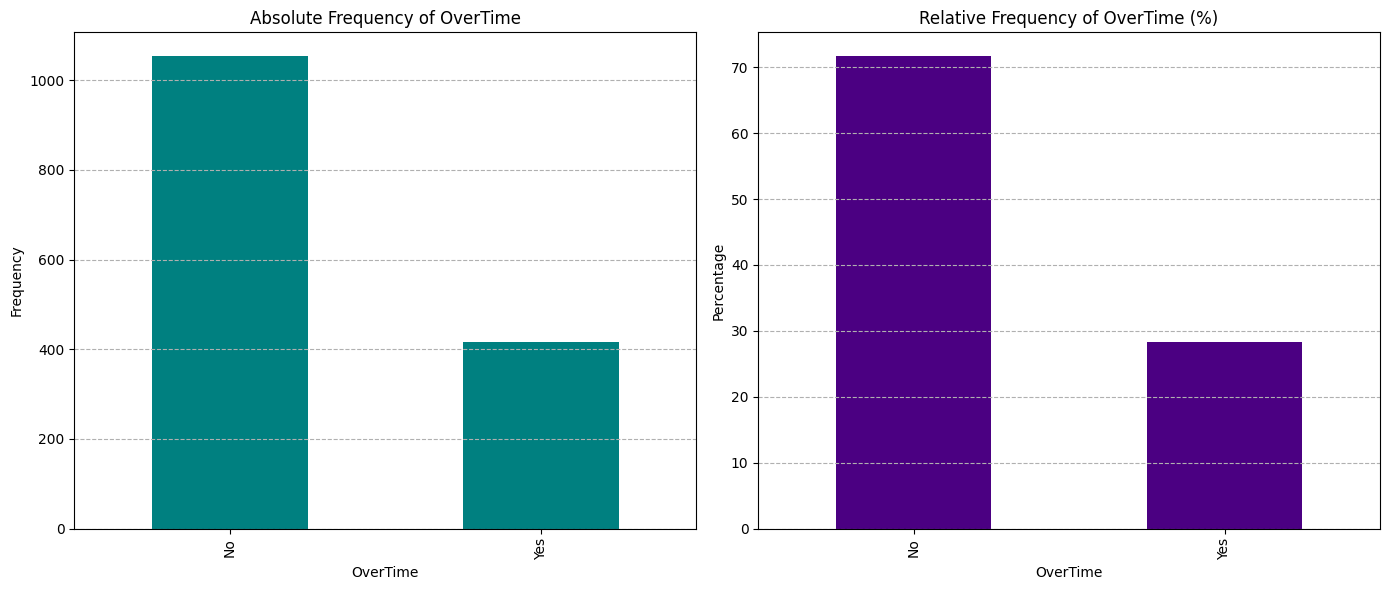

In [ ]:
def plot_frequency(variable, title):
    # Calculate absolute frequency
    abs_freq = df[variable].value_counts()

    # Calculate relative frequency
    rel_freq = df[variable].value_counts(normalize=True) * 100

    plt.figure(figsize=(14, 6))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='#008080')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    #Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='#4B0082')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

# Plotting for Gender
plot_frequency('Gender', 'Gender')

# Plotting for Department
plot_frequency('Department', 'Department')

# Plotting for Education Field
plot_frequency('EducationField', 'Education Field')

# Plotting for Job Role
plot_frequency('JobRole', 'Job Role')

# Plotting for Job Level
plot_frequency('JobLevel', 'Job Level')

# Plotting for OverTime
plot_frequency('OverTime', 'OverTime')


The histograms showcase the frequency distribution of the categoricaal variable. Analysing such variables provides a better understanding of the dataset. For instance, we can conclude that the company is predominantly composed of male employees. Furthermore, most employees belong to the Research & Development department and have a backgrounds in Life Sciences and Medical fields. The most common roles are Sales Executives and Research Scientists, and most employees are at entry or junior levels (Job Levels 1 and 2). While the majority of employees do not work overtime, there is still a notable percentage who do.








##### **Boxplots**

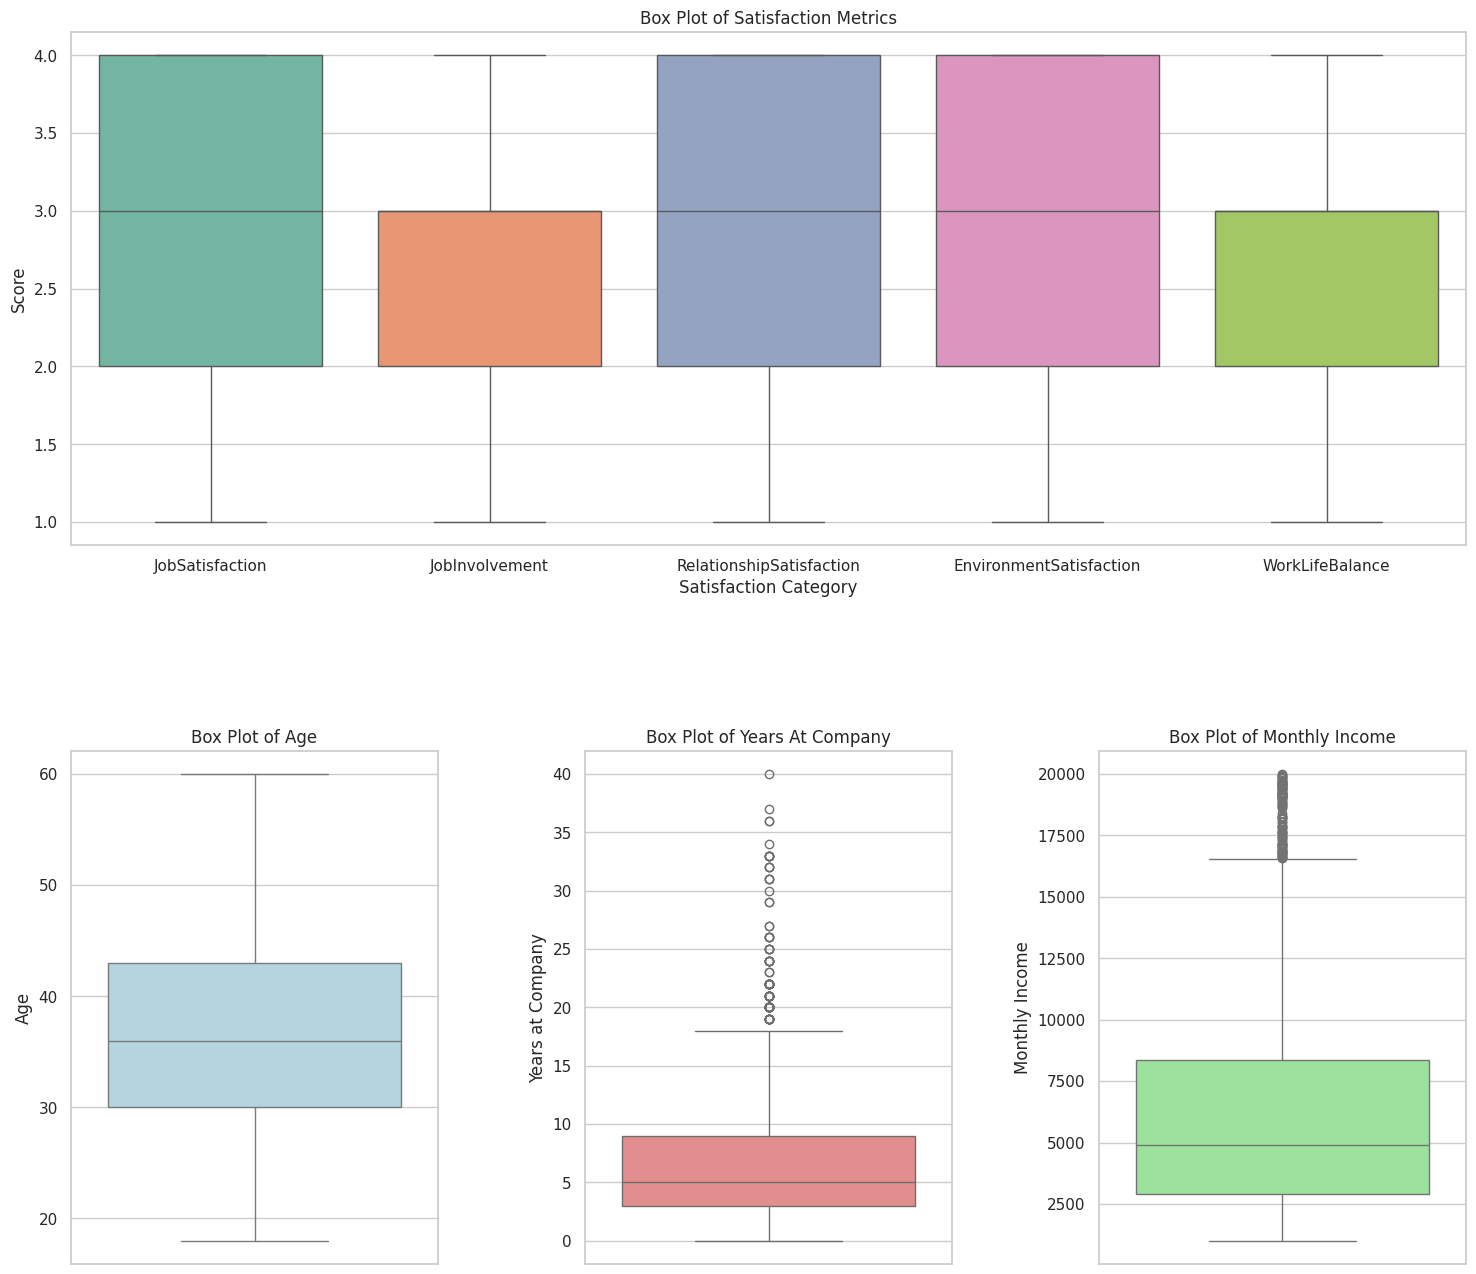

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots: 2 rows, first row spans 2 columns, second row has 3 columns
fig = plt.figure(figsize=(18, 16))
# Add grid for 2 rows: First row spans across, second row divided into 3 parts
gs = fig.add_gridspec(2, 3, hspace=0.4)

# First row: Single plot spanning across all three columns (Satisfaction metrics boxplots)
ax1 = fig.add_subplot(gs[0, :])  # This makes the first row span across all columns
satisfaction_columns = ['JobSatisfaction', 'JobInvolvement', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
df_satisfaction = df[satisfaction_columns]

# Melt the DataFrame for easier plotting of multiple boxplots
df_satisfaction_melted = df_satisfaction.melt(var_name='Satisfaction Category', value_name='Score')

# Create boxplot for satisfaction-related metrics
sns.boxplot(x='Satisfaction Category', y='Score', data=df_satisfaction_melted, ax=ax1, hue='Satisfaction Category', palette='Set2', dodge=False)
ax1.set_title('Box Plot of Satisfaction Metrics')
ax1.set_ylabel('Score')

# Second row: 3 boxplots for Age, YearsAtCompany, and MonthlyIncome
ax2 = fig.add_subplot(gs[1, 0])  # First column in the second row
ax3 = fig.add_subplot(gs[1, 1])  # Second column in the second row
ax4 = fig.add_subplot(gs[1, 2])  # Third column in the second row

# Age boxplot
sns.boxplot(y=df['Age'], ax=ax2, color='lightblue')
ax2.set_title('Box Plot of Age')
ax2.set_ylabel('Age')

# YearsAtCompany boxplot
sns.boxplot(y=df['YearsAtCompany'], ax=ax3, color='lightcoral')
ax3.set_title('Box Plot of Years At Company')
ax3.set_ylabel('Years at Company')

# MonthlyIncome boxplot
sns.boxplot(y=df['MonthlyIncome'], ax=ax4, color='lightgreen')
ax4.set_title('Box Plot of Monthly Income')
ax4.set_ylabel('Monthly Income')

# Adjust layout to prevent overlapping
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plots
plt.show()

Plotting the boxplots of the variables relevant for our study allows to identify outliers that might affect the analysis.

Both variables *YearsAtCompany* and *MonthlyIncome* present outliers. Regarding the first one, the maximum value is 40, which is a plausible amount of years spent in the company. Moreover, the variable has a standard deviation of 6.13, which is not excessively high. The scatterplot below showcases the relationship between age and years spent in the company. It is possible to observe that the employee that has worked for 40 years is almost 60 years old. Assuming 15-20 years of study it's plausible that the employee has actually worked for that amount of time. The same can be said for all the other employees.

Regarding the variable *MonthlyIncome*, it presents several outliers and it has a standard deviation of 4707.96. This might indicate that some of the employees earn a disproportioned amount compared to the other employees, but there is no evidence that might indicate that these values should be removed.

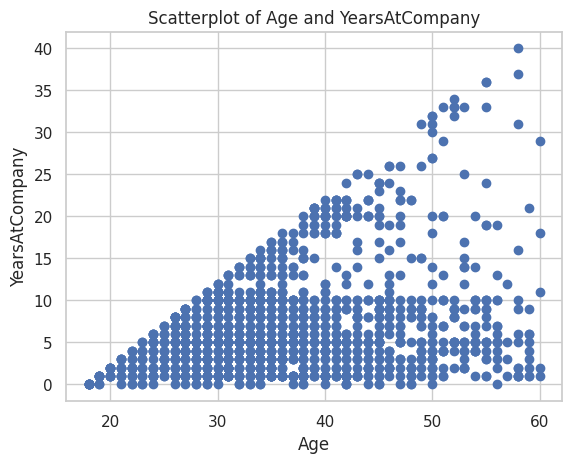

In [ ]:
# Scatterplot Age and YearsAtCompany
plt.scatter(df['Age'], df['YearsAtCompany'])

# Add title and labels
plt.title('Scatterplot of Age and YearsAtCompany')
plt.xlabel('Age')
plt.ylabel('YearsAtCompany')

# Show plot
plt.show()

##### **Distributions**

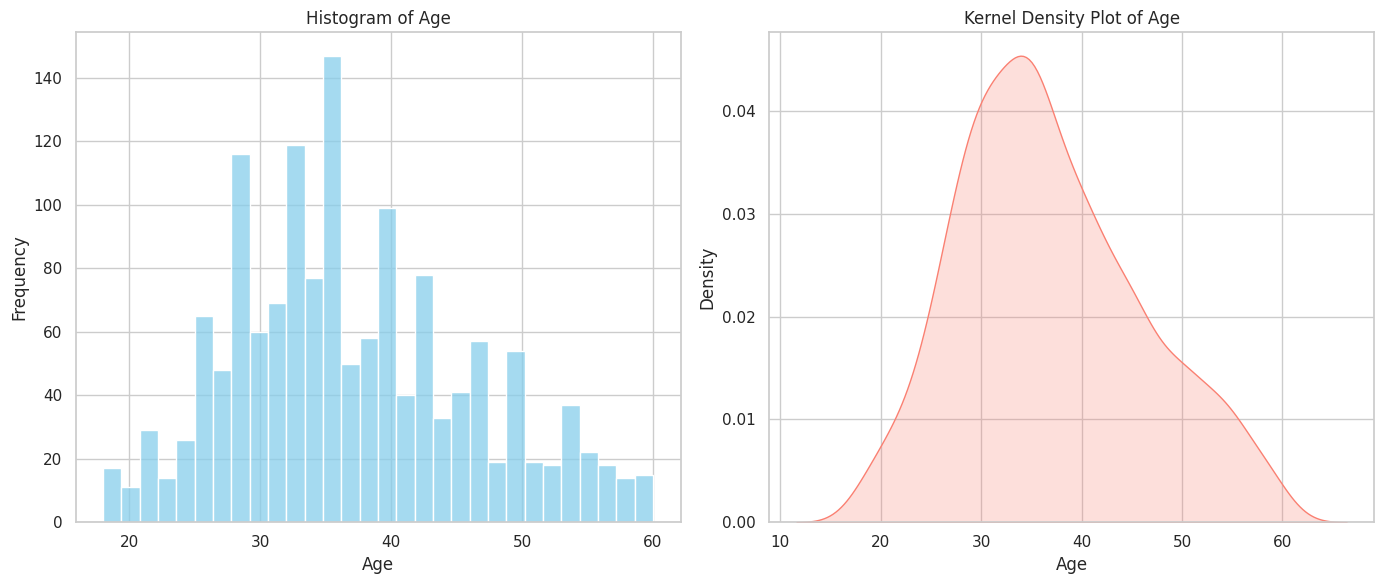

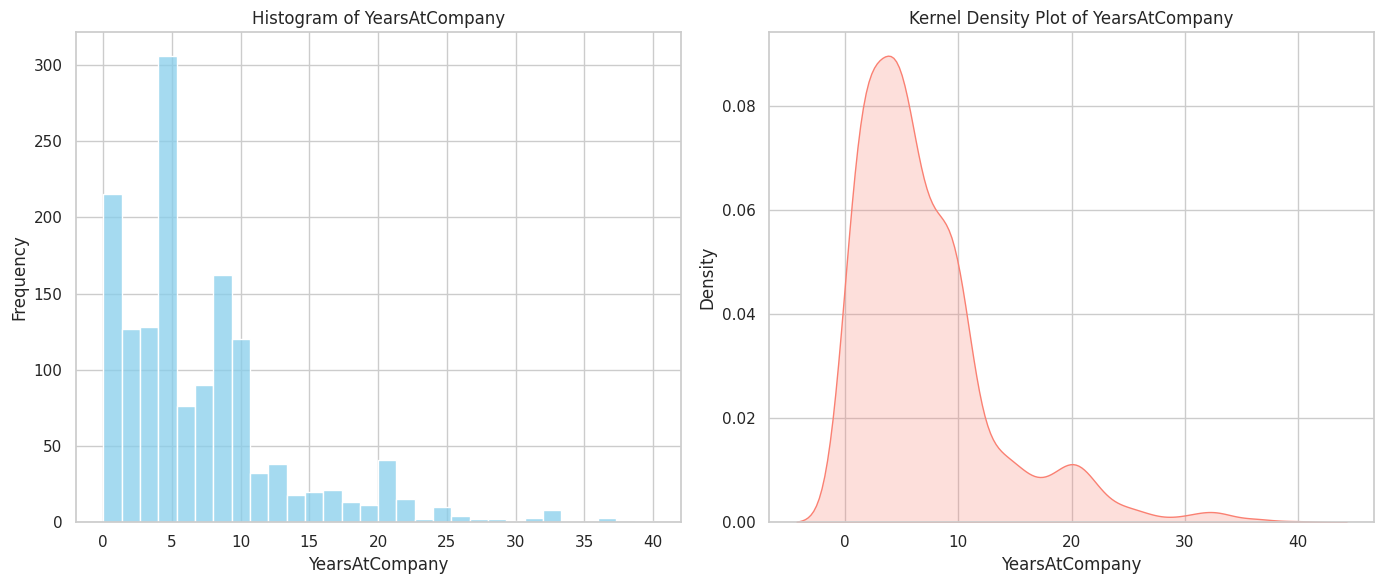

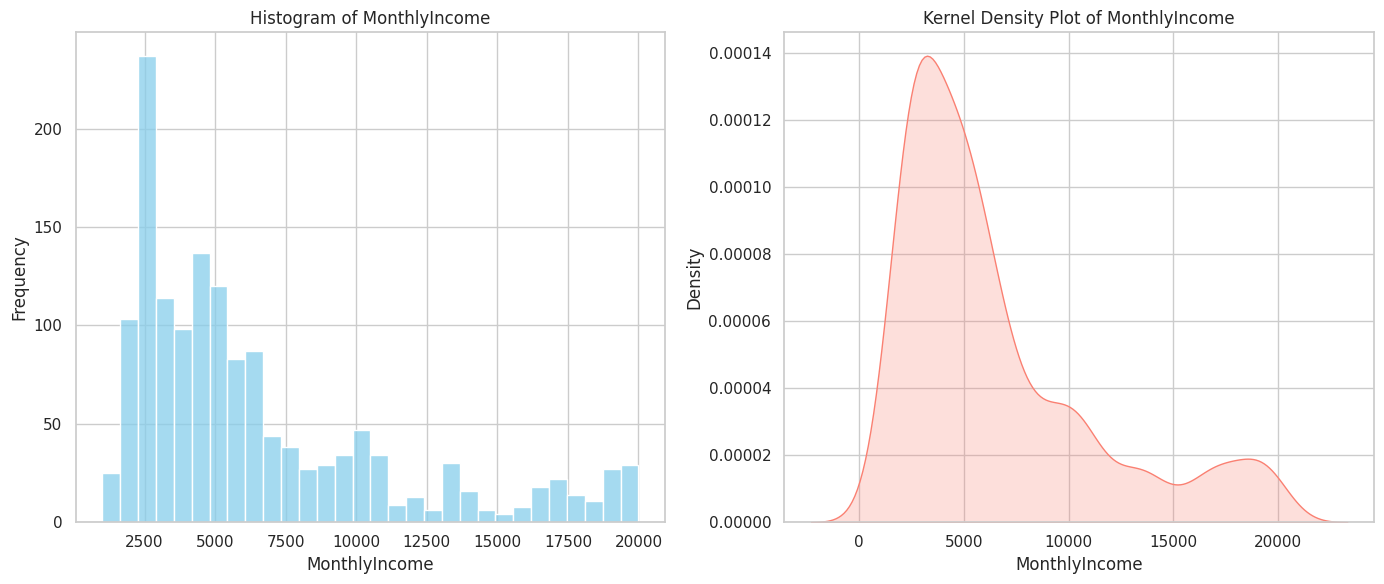

In [ ]:
# List of variables to plot
var_to_be_graph = ['Age', 'YearsAtCompany', 'MonthlyIncome']

# Loop through each variable in the list and generate plots
for var in var_to_be_graph:
    # Set the figure size for the plots
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Kernel Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[var], fill=True, color='salmon')  # Replace shade=True with fill=True
    plt.title(f'Kernel Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)

    # Adjusting layout to prevent overlapping of plots
    plt.tight_layout()

    # Show each plot before moving to the next variable
    plt.show()


The Age distribution shows that most employees fall between 30 and 40 years old, with the overall distribution being slightly left-skewed, indicating a younger workforce.

In terms of YearsAtCompany, the data reveals that the majority of employees have fewer than 10 years of experience with the company, reflecting a workforce with predominantly short to medium tenure. This right-skewed distribution indicates that fewer employees stay with the company for extended periods.

For Monthly Income, there is a clear right-skewed distribution, with most employees earning lower incomes and a smaller proportion earning significantly higher salaries.

To further explore the distribution of the data, the following section computes the skewness aand kurtois of the variables.

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

# Age
print('Age skewness:', str(skew(df.Age, axis=0, bias=True)))
print('Age kurtosis:', str(kurtosis(df.Age, axis=0, bias=True)))

# MonthlyIncome
print('MonthlyIncome skewness:', str(skew(df.MonthlyIncome, axis=0, bias=True)))
print('MonthlyIncome kurtosis:', str(kurtosis(df.MonthlyIncome, axis=0, bias=True)))

#YearsAtCompany
print('YearsAtCompany skewness:', str(skew(df.YearsAtCompany, axis=0, bias=True)))
print('YearsAtCompanu kurtosis:', str(kurtosis(df.YearsAtCompany, axis=0, bias=True)))

Age skewness: 0.41286446154785084
Age kurtosis: -0.40685066033188644
MonthlyIncome skewness: 1.3684185123330814
MonthlyIncome kurtosis: 0.9977379294765711
YearsAtCompany skewness: 1.7627284034822992
YearsAtCompanu kurtosis: 3.918056556094462


For normal distributions, skewness should be 0 and Kurtois should be 3.

Age is slightly right-skewed and flatter than a normal distribution, indicating a relatively balanced spread of ages with fewer extreme values. MonthlyIncome is noticeably right-skewed with lighter tails than a normal distribution, indicating a wide disparity in incomes but fewer extreme values than might be expected with such skewness. Finally, years at company is highly right-skewed with heavier tails than a normal distribution, indicating most employees have shorter tenures, but there are significant outliers with very long tenures.

One can try to normalize the distributions by applying transformations on the variables.

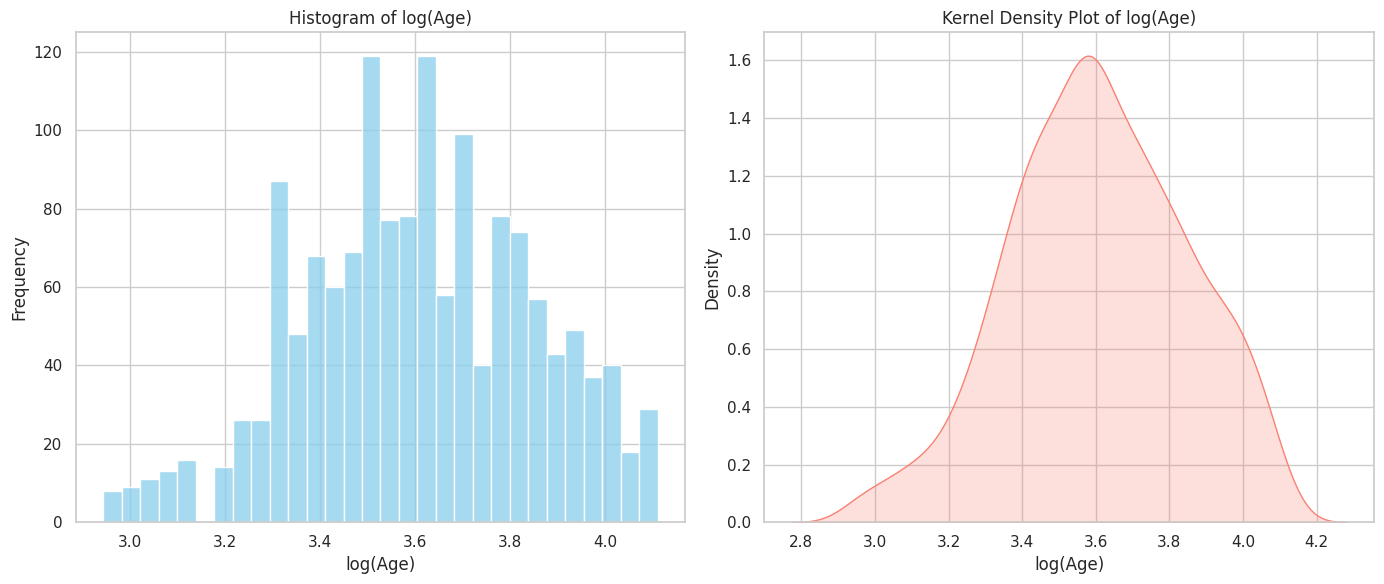

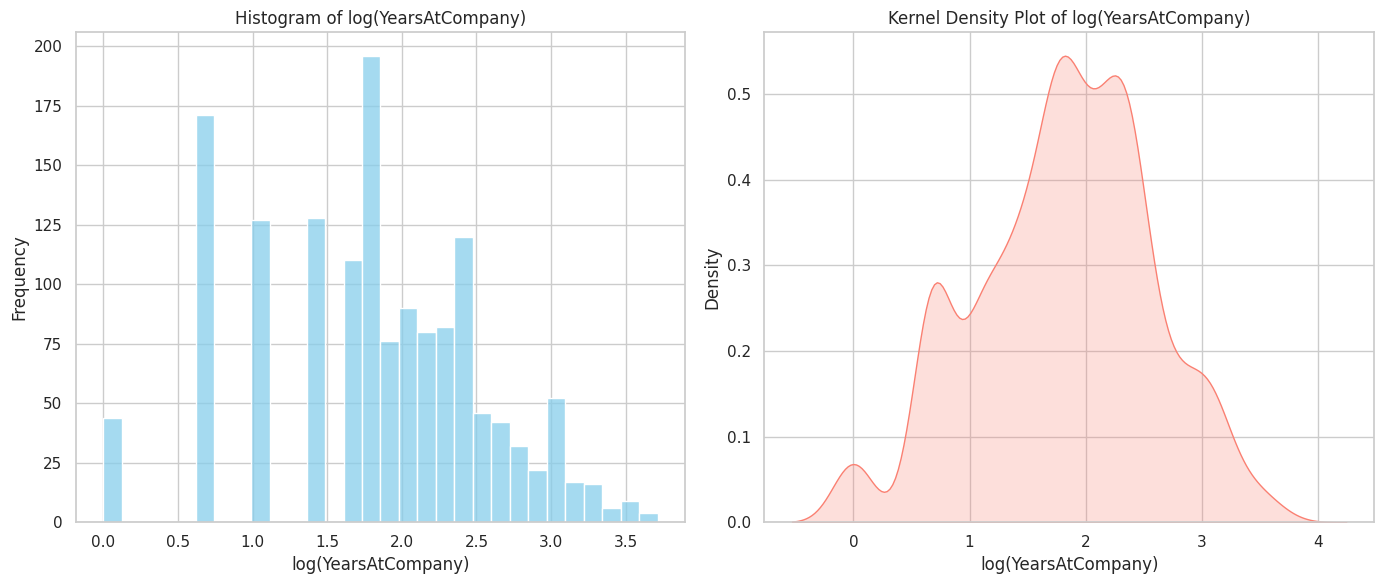

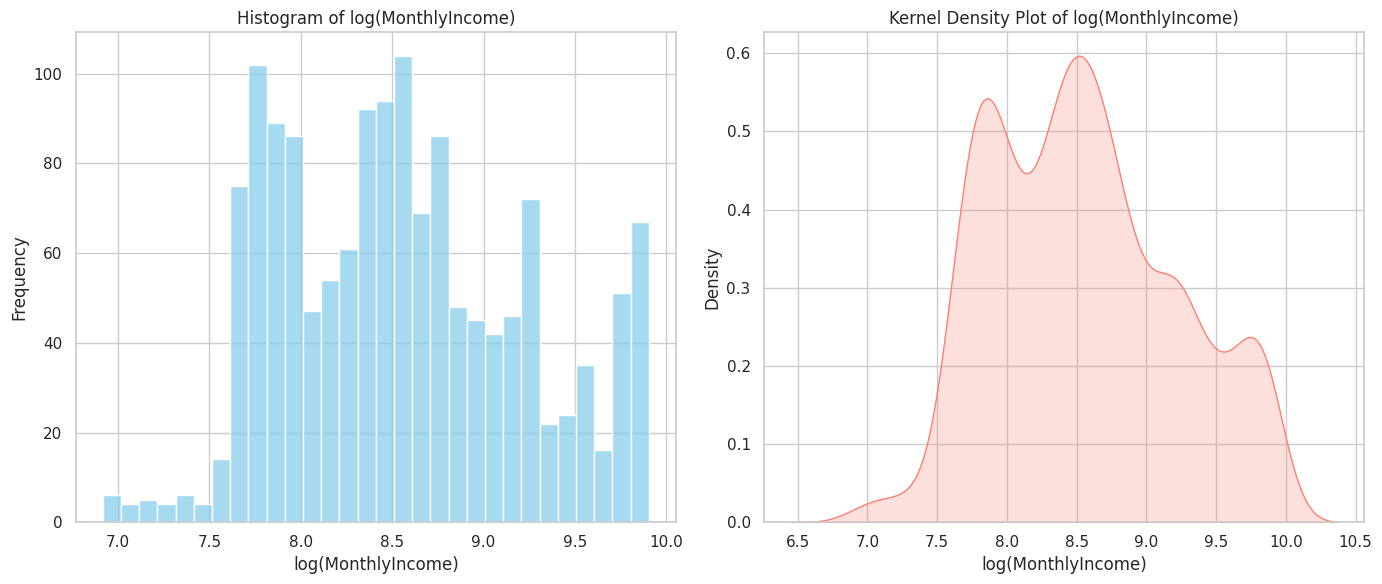

In [ ]:
# Set the list of variables to plot histograms and density plots for
var_to_be_graph = ['Age', 'YearsAtCompany', 'MonthlyIncome']

# Loop through each variable in the list, apply logarithmic transformation, and generate plots
for var in var_to_be_graph:
    # Apply logarithmic transformation (adding 1 to avoid log(0))
    transformed_var = np.log(df[var] + 1)

    # Set the figure size for the plots
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(transformed_var, bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of log({var})')
    plt.xlabel(f'log({var})')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Kernel Density Plot with `fill` instead of `shade`
    plt.subplot(1, 2, 2)
    sns.kdeplot(transformed_var, fill=True, color='salmon')  # Use fill=True instead of shade
    plt.title(f'Kernel Density Plot of log({var})')
    plt.xlabel(f'log({var})')
    plt.ylabel('Density')
    plt.grid(True)

    # Adjusting layout to prevent overlapping of plots
    plt.tight_layout()
    plt.show()  # Show each plot set individually





In [ ]:
#new mean, sd and skewness factors

# List of variables to transform and analyze
variables = ['Age', 'YearsAtCompany', 'MonthlyIncome']

# Create a new DataFrame to store the log-transformed variables
log_transformed_df = pd.DataFrame()

# Apply log transformation (adding 1 to avoid log(0) issue) and store in new DataFrame
for var in variables:
    log_transformed_df[f'log_{var}'] = np.log(df[var] + 1)

# Function to calculate skewness, kurtosis, mean, and standard deviation
def calculate_stats(df, var):
    skewness = skew(df[var])
    kurt = kurtosis(df[var], fisher=False)  # Use Fisher=False to get Pearson's definition (normal kurtosis is 3)
    mean_val = df[var].mean()
    std_dev = df[var].std()
    return skewness, kurt, mean_val, std_dev

# Calculate and print statistics for original and log-transformed variables
for var in variables:
    original_stats = calculate_stats(df, var)
    log_stats = calculate_stats(log_transformed_df, f'log_{var}')

    print(f"Original {var} - Skewness: {original_stats[0]:.4f}, Kurtosis: {original_stats[1]:.4f}, Mean: {original_stats[2]:.4f}, Std Dev: {original_stats[3]:.4f}")
    print(f"Log {var} - Skewness: {log_stats[0]:.4f}, Kurtosis: {log_stats[1]:.4f}, Mean: {log_stats[2]:.4f}, Std Dev: {log_stats[3]:.4f}")
    print('-' * 50)

Original Age - Skewness: 0.4129, Kurtosis: 2.5931, Mean: 36.9238, Std Dev: 9.1354
Log Age - Skewness: -0.1361, Kurtosis: 2.6459, Mean: 3.6064, Std Dev: 0.2431
--------------------------------------------------
Original YearsAtCompany - Skewness: 1.7627, Kurtosis: 6.9181, Mean: 7.0082, Std Dev: 6.1265
Log YearsAtCompany - Skewness: -0.2075, Kurtosis: 2.7138, Mean: 1.8117, Std Dev: 0.7569
--------------------------------------------------
Original MonthlyIncome - Skewness: 1.3684, Kurtosis: 3.9977, Mean: 6502.9313, Std Dev: 4707.9568
Log MonthlyIncome - Skewness: 0.2862, Kurtosis: 2.3007, Mean: 8.5528, Std Dev: 0.6643
--------------------------------------------------


The log transformations have made the variables more normally distributed. The transformations have effectively reduced the skewness and adjusted the kurtosis values closer to what is expected in a normal distribution. Moreover, the standard deviation is notably lower for all three variables.

##### **Correlation**

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: >

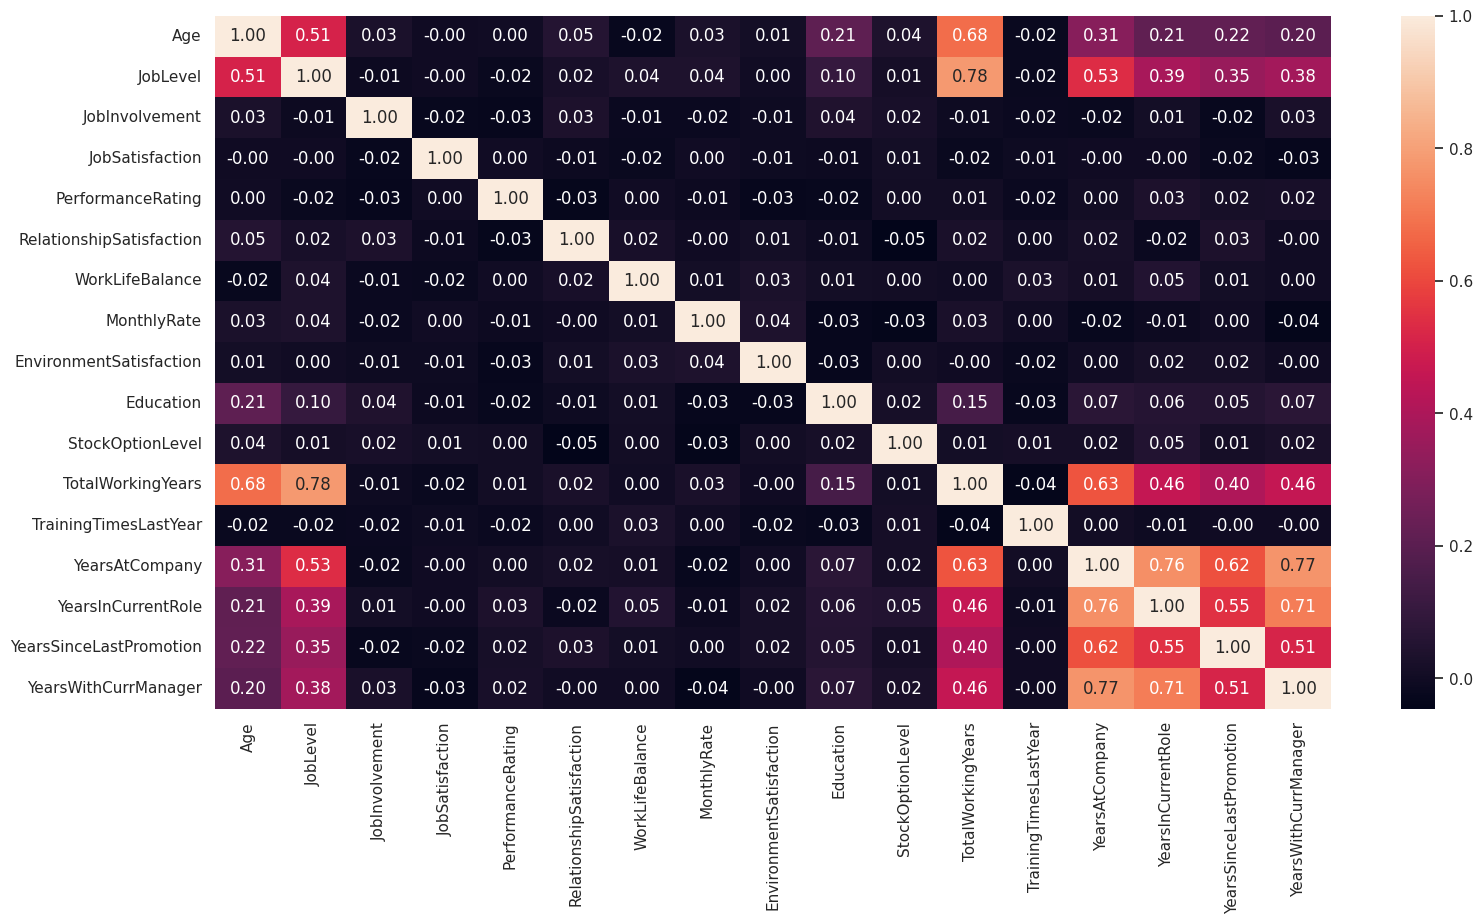

In [ ]:
df_corr = df[['Age', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',  'WorkLifeBalance', 'MonthlyRate',  'EnvironmentSatisfaction', 'Education', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',]]


plt.figure(figsize=(18,9))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f')

Overall, the analysis shows that there is only a **tiny correlation** between most workplace environment factors and monthly rate, with insignificant relationships between *MonthlyRate* and variables like *JobSatisfaction* (-0.01) and *EnvironmentSatisfaction* (0.03). However, strong correlations exist between work experience-related factors, such as *TotalWorkingYears* and *JobLevel* (0.78) or *YearsAtCompany* and *YearsWithCurrManager* (0.77), indicating that tenure and experience play a more significant role in these relationships.

## **4. Method 1: Multiple Linear Regression**

In the first part of our analysis, we aim to explore how various satisfaction measures influence the duration of employee tenure. Employee retention is critical for organizational success, and understanding the factors that impact an employee's decision to stay is key to reducing turnover. Specifically, we focus on five key satisfaction metrics: work-life balance, work environment satisfaction, job satisfaction, job involvement, and relationship satisfaction. By investigating the relationship between these factors and the length of employee tenure, we aim to gain insights that can inform better workplace policies and employee engagement strategies.

**Model Selection**

To test the hypotheses, a multiple linear regression model was selected. This model is appropriate because it allows to assess the effect of multiple independent variables (the satisfaction measures) on a continuous dependent variable (employee tenure).

Multiple linear regression is well-suited for hypothesis testing, as it allows to determine whether the relationship between satisfaction measures and tenure is statistically significant. Specifically, we will use this model to test the following hypotheses:

H0₁: Work-life balance, work environment satisfaction, job satisfaction, job involvement, and relationship satisfaction have no significant impact on the duration of an employee's tenure.

HA₁: Work-life balance, work environment satisfaction, job satisfaction, job involvement, and relationship satisfaction have a significant impact on the duration of an employee's tenure.


### **4.1 Model**

In [ ]:
model = smf.ols(formula= 'YearsAtCompany ~ EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + JobInvolvement + WorkLifeBalance', data=df)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2946
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.916
Time:                        15:19:07   Log-Likelihood:                -4749.2
No. Observations:                1470   AIC:                             9510.
Df Residuals:                    1464   BIC:                             9542.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# add predictions and residuals to the dataframe
df['PredictedYearsAtCompany'] = results.predict(df)
df['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)

The model has an R-squared value of 0.001, which indicates that only 0.1% of the variance in *YearsAtCompany* is explained by the model. This suggests a very weak fit. Moreover, the Adjusted R-squared is negative, which implies that the model is worse than a model with no predictors, i.e., it would have been better to predict the mean of the dependent variable rather than using these predictors. Furthermore, the F-statistic tests whether at least one predictor variable is statistically significant in predicting the dependent variable. This model presents an F-statistic of 0.2946, with a high p-value (i.e., 0.916), indicating that the model is not statistically significant. But let's analyse the single coefficients to understand the situation better.

The intercept is statistically significant with a p-value of 0.000. This means that when all predictor variables are zero, the expected tenure at the company is approximately 6.9945 years.

Regarding the predictor coefficients, one can observe that none of the predictor variables are statistically significant, as all p-values are well above 0.05 (i.e., considering a 95% confidence level). Firstly, *EnvironmentSatisfaction*'s coefficient is not statistically significant (p > 0.05), meaning that the coefficient does not differ significantly from 0. The p-value of 0.976 indicates that *EnvironmentSatisfaction* does not have a meaningful impact on tenure, considering all else equal. The same can be said about *JobSatisfaction* (β = -0.0211, t(1464) = -0.145, p = 0.884), *RelationshipSatisfaction* (β = 0.1124, t(1464) = 0.759, p = 0.448), *JobInvolvement* (β = -0.1890, t(1464) = -0.839, p = 0.401), and *WorkLifeBalance* (β = 0.0979, t(1464) = 0.432, p = 0.666). Hence, considering all else equal, none of these predictor variables individually have an impact on the employee tenure.


### **4.2 Assumptions**

To ensure that the OLS linear regression model satisfies the assumptions of the Gauss-Markov Theorem, this section will evaluate the dataset for linearity, multicollinearity, homoscedasticity, normality of residuals, and independence of errors.

#### **4.2.1 Linearity**

The relationship between the independent and dependent variables should be linear. Because the model includes five independent variables, the appropriate way of checking for the linearity assumption is to plot the actual and the predicted values. The scatterplot should show a linear relationship between predicted values and actual values, and the residuals should have no obvious pattern.

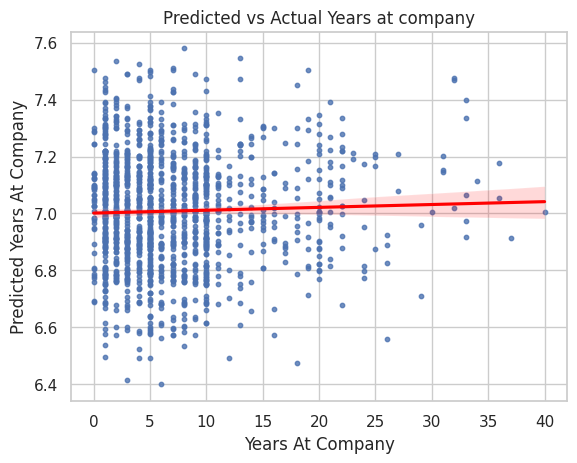

In [ ]:
# Plotting the scatter plot with a line of best fit
sns.regplot(x='YearsAtCompany', y='PredictedYearsAtCompany', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Years At Company')
plt.ylabel('Predicted Years At Company')
plt.title('Predicted vs Actual Years at company')
plt.show()

**Interpretation**

The scatterplot shows no linear relationship, meaning that the linearity assumption is violated. Hence, the linear regression is not the appropriaate method to study the relationship between these variables.

#### **4.2.2 Homoscedasticity**

To fulfill this assumption, the residuals, i.e., the errors, should exhibit constant variance. In order to assess this assumption, the residuals can be plotted with the predicted values and with the observed values, and see if there are odd patterns.

If the assumption is fulfilled, the residuals will vary equally for all predicted and actual values, i.e., they should follow a line and not spread out.

**Residuals VS Predicted Values**

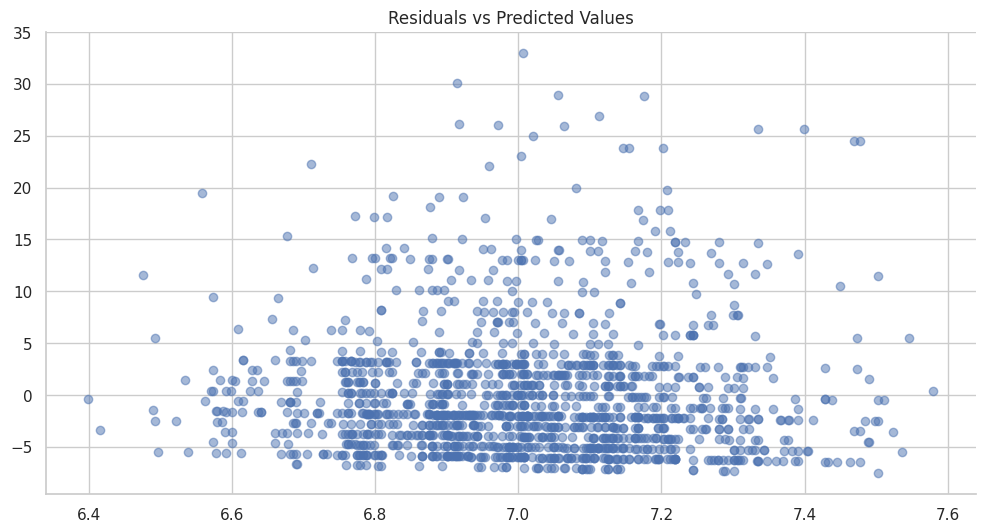

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.PredictedYearsAtCompany, y=df.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals vs Predicted Values')
plt.show()

**Residuals VS Actual Values**

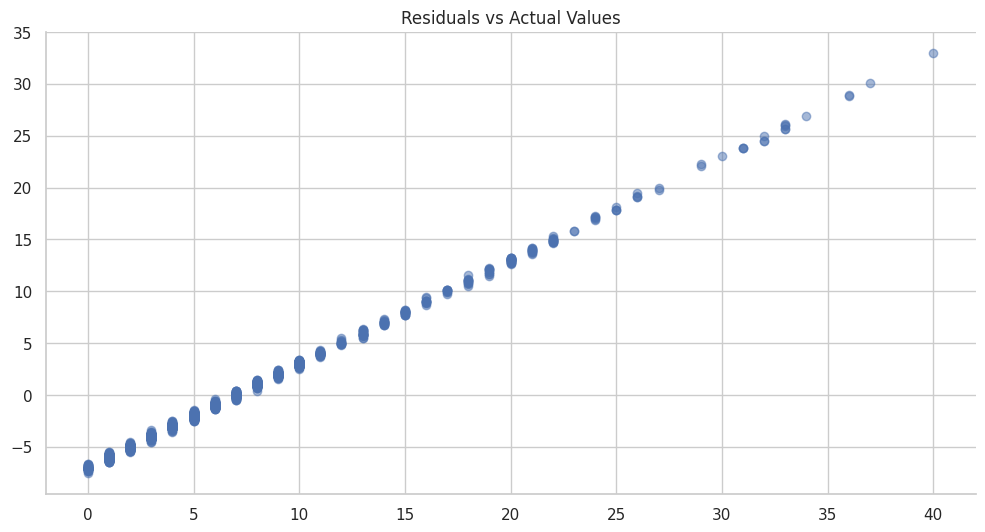

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.YearsAtCompany, y=df.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals vs Actual Values')
plt.show()

**Interpretation**

Both graphs show unusual patterns and spread, which indicates inconsistent variance of the residuals. Hence, the assumption is not checked.

To make up for this, the HC3 (Heteroscedasticity-Consistent Standard Errors) is a valid methods used to adjust standard errors in the presence of heteroscedasticity. This adjustment allows for more reliable hypothesis testing and confidence intervals, even when heteroscedasticity is present.



**Heteroscedasticity robust standard errors**

In [ ]:
# Fit the linear regression model
model = smf.ols(formula= 'YearsAtCompany ~ EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + JobInvolvement + WorkLifeBalance', data=df) # using heteroscedasticity robust standard errors
results = model.fit(cov_type = "HC3")

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2967
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.915
Time:                        15:19:09   Log-Likelihood:                -4749.2
No. Observations:                1470   AIC:                             9510.
Df Residuals:                    1464   BIC:                             9542.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

As aforementioned Heteroscedasticity-Consistent Standard Errors (like HC3) is a valid approach to adjust the standard errors in a linear regression analysis, as it allows for reliable hypothesis testing even when heteroscedasticity is present. However, because the original model is so weak, the improvements are not substantial. Looking at the HC3 output it is possible to observe that the adjusted R-squared has not improved and it's still negative. Hence, heteroscedasticity is not the only problem of the model.

The coefficients and their p-values are also similar to those of the original model, and none of them is significant. The p-value of 0.977 (higher that the original model) indicates that *EnvironmentSatisfaction* does not have a meaningful impact on tenure, considering all else equal. The same can be said about *JobSatisfaction* (β = -0.0221, z = 0.146, p = 0.884), *RelationshipSatisfaction* (β = 0.1124, z = 0.757, p = 0.449), *JobInvolvement* (β = -0.189, z = -0.824, p = 0.410), and *WorkLifeBalance* (β = 0.0979, z = 0.440, p = 0.660). Similarly to the previous model, none of these predictor variables individually have an impact on the years spent in the company.




#### **4.2.3. Normality of Residuals**

For this assumption to be fulfilled, residuals should be normally distributed. The assumption can be checked by creating a Q-Q plot: if the points in the graph follow the straight line they are normally distributed.

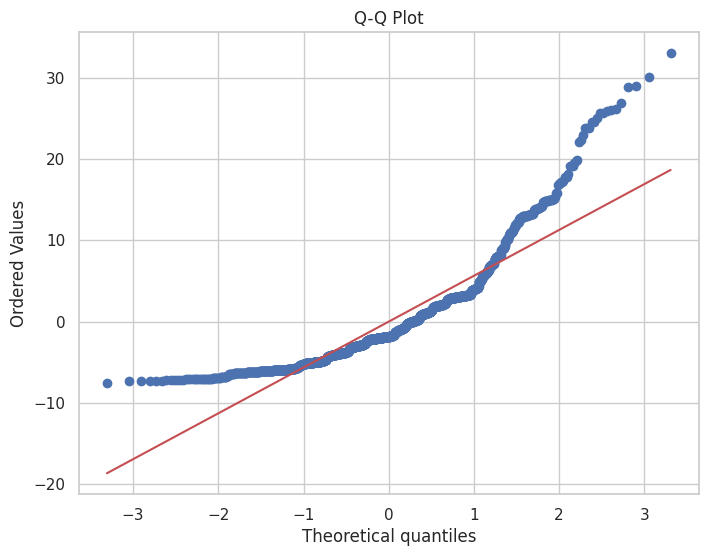

In [ ]:
from scipy import stats
# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

**Interpretation**

The Q-Q plot shows that residuals do not have a normal distribution as they do not follow the line. We cannot assume residuals to be normally distributed. To fix this assumption one could apply a transformation to the dependent variables, e.g., a logarithmic transformation to the *YearsAtCompany*, as shown in the model below.

In [ ]:
#create a column in the dataset with the transformed variable YearsAtCompany
df['log_YearsAtCompany'] = np.log(df['YearsAtCompany']+1)

#create a model with the transformed variable
model = smf.ols(formula= 'log_YearsAtCompany ~ EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + JobInvolvement + WorkLifeBalance', data=df)
results = model.fit()

# Print the regression results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:     log_YearsAtCompany   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1306
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.985
Time:                        15:19:09   Log-Likelihood:                -1675.5
No. Observations:                1470   AIC:                             3363.
Df Residuals:                    1464   BIC:                             3395.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

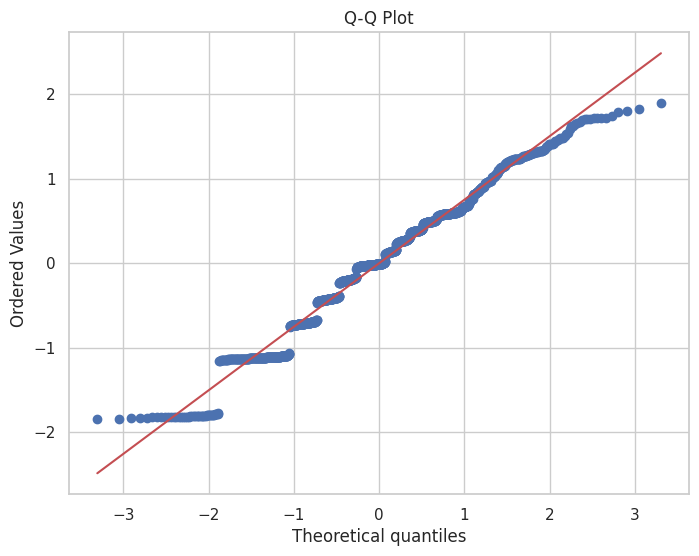

In [ ]:
# add predictions and residuals to the dataframe
df['PredictedYearsAtCompany'] = results.predict(df)
df['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)
# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

**Interpretation**

The transformation of the dependent variable hasn't solved the problem as the residuals of the transformed model still don't follow a normal distribution, especially at the tails where the points deviate from the line.

#### **4.2.4. Multicollinearity**

Multicollinearity arises if two or more independent variables in a regression model are highly correlated. Hence, dependent variables should not be linear combinations of other variables. The Variance inflation factor (VIF) can be used to check for this assumption.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor                  features
0       49.67                 Intercept
1        1.00   EnvironmentSatisfaction
2        1.00           JobSatisfaction
3        1.00  RelationshipSatisfaction
4        1.00            JobInvolvement
5        1.00           WorkLifeBalance


**Interpretation**

All VIFs are below the threshold of 10. Even considering a more conservative treshold of 5, the variables do not present the problem of multicollinearity

#### **4.2.5. Independence of Errors**

This assumption refers to the problem of Autocorrelation, which happens when the error terms are correlated, e.g., first-order autocorrelation implies that the error of an observation in correlated to the error of the observation before. This assumption can be checked by performing the Durbin-Watson test.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(df['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0368160152886916


**Interpretation**

The Durbin-Watson test yields a value of 2.04, which lies within the [1.5; 2.5] interval. Hence, the assumption is fulfilled and we can assume independence of errors.

### **4.3 Findings**

Based on the results of the multiple regression analysis, we fail to reject the null hypothesis the stated that work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have no significant impact on the duration of an employee's tenure.

Firstly, the R-squared value of 1% indicates that only a very small portion of the variability in the dependent variable, *YearsAtCompany*, is explained by the predictors. The negative adjusted R-squared suggests that the model may not be appropriate for the data, as it indicates a lack of fit.

Moroever, all predictor variables have insignificant coefficients, meaning that a change in any of the variables, holding everything else equal, is not going to increase the employee's tenure.

Finally, the linearity, homoscedasticity, and normality of residuals assumptions cannot be checked. Therefore, the multiple linear regression is not the most appropriate model to study the variables at hand.

One possible explanation for the weakness of the model is the omission of an essential predictor variable that has a strong relationship with the dependent variable. Consequently, the model fails to capture the true underlying patterns in the data, leading to biased estimates of the coefficients for the included predictors, reducing the model's overall explanatory power and resulting in a low or even negative adjusted R-squared. For instance, higher income can lead to longer job tenure primarily through increased job satisfaction (Mueser et al., 2001). The correlation matrix in the exploratory analysis further supprts the hypotheis that the omitted variable might be *MonthlyIncome*.

The following model includes *MonthlyIncome* as a predictor.


### **4.4 Refined Model**

In [ ]:
model = smf.ols(formula= 'YearsAtCompany ~ EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + JobInvolvement + WorkLifeBalance + MonthlyIncome', data=df)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     87.80
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           3.76e-94
Time:                        15:19:10   Log-Likelihood:                -4523.9
No. Observations:                1470   AIC:                             9062.
Df Residuals:                    1463   BIC:                             9099.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The R-squared value is 0.265, which means that 26.5% of the variance in YearsAtCompany is explained by the model. This is a significant improvement compared to the previous model (R-squared = 0.001), indicating a much better fit and an improved explanatory power of the model. The F-statistic is 87.80 with a p-value of 3.76e-94, indicating that the overall model is statistically significant.

Regarding the coefficients, only *MonthlyIncome* is statistically significant. The coefficient is 0.0007 (p-value=0.000). Hence, for every unit increase in MonthlyIncome, the expected tenure at the company increases by 0.0007 years, holding all other variables constant. The lack of statistical significance in the other predictor variables (i.e., *EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, JobInvolvement, WorkLifeBalance*) indicates that these factors do not individually have a meaningful impact on employee tenure in the presence of MonthlyIncome.

#### **4.4.1 Assumptions check**

##### **Linearity**

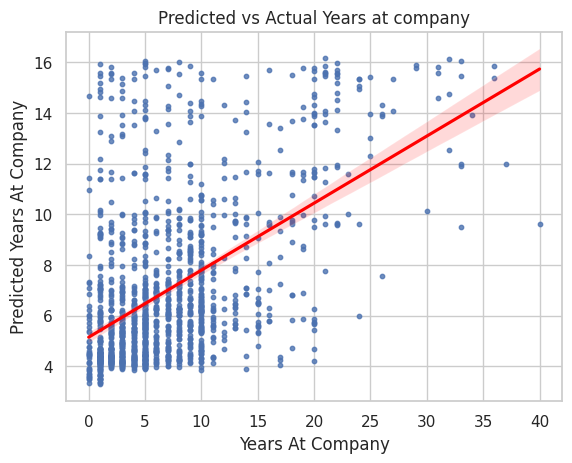

In [ ]:
# add predictions and residuals to the datafraame
df['NewModel_PredictedYearsAtCompany'] = results.predict(df)
df['NewModel_residuals'] = results.resid # computing residuals (i.e., actual - predicted values)

# Plotting the scatter plot with a line of best fit
sns.regplot(x='YearsAtCompany', y='NewModel_PredictedYearsAtCompany', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Years At Company')
plt.ylabel('Predicted Years At Company')
plt.title('Predicted vs Actual Years at company')
plt.show()

##### **Homoscedasticity**

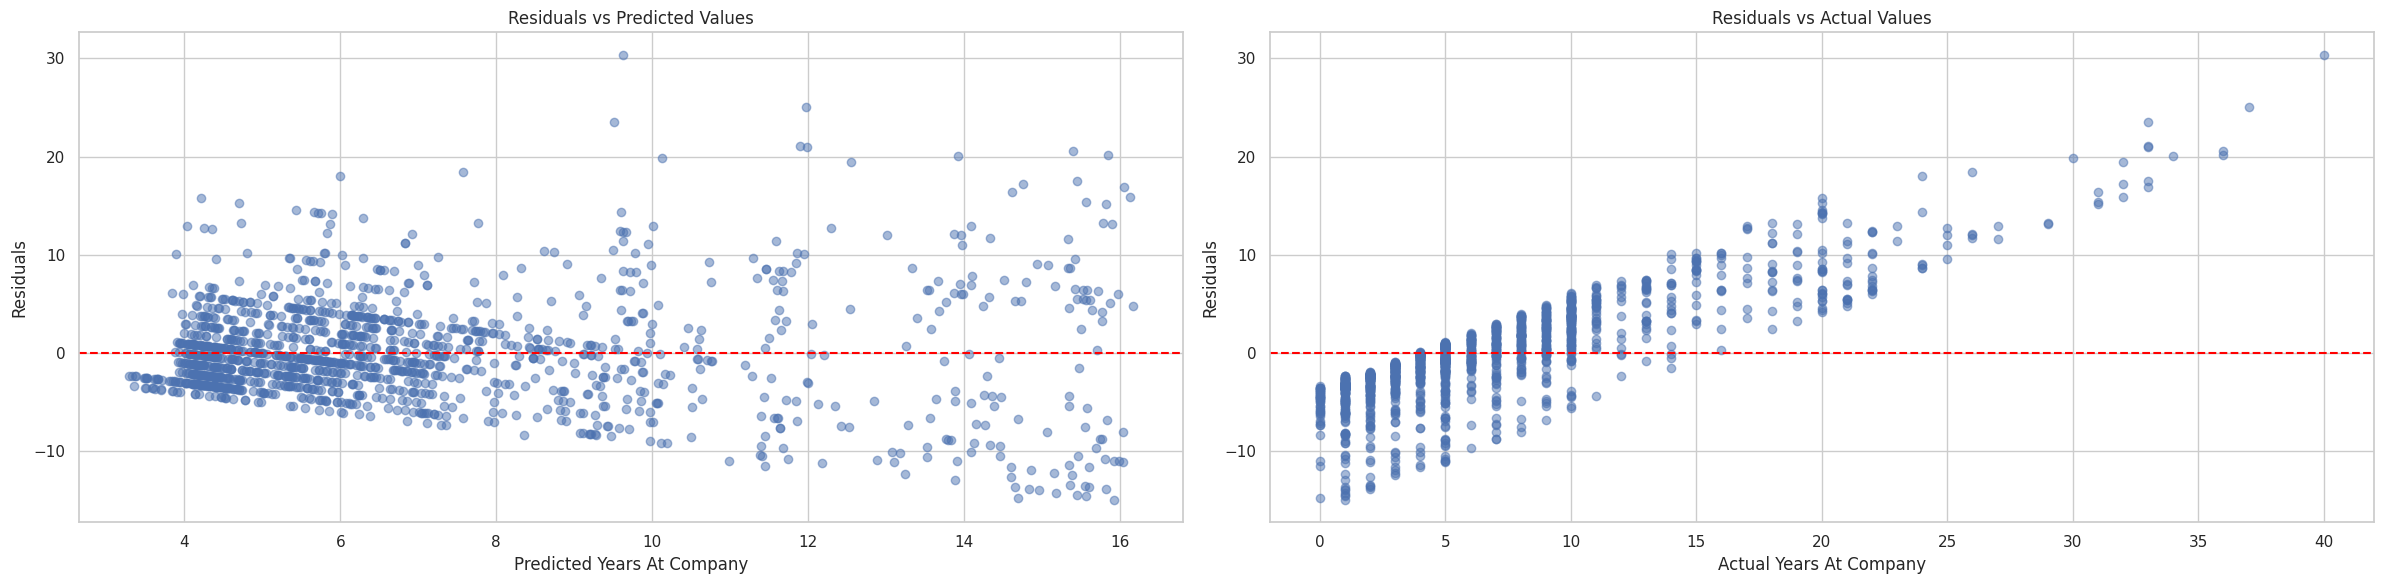

In [ ]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(24, 6))

# Residuals vs predicted values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(x=df.NewModel_PredictedYearsAtCompany, y=df.NewModel_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Years At Company')
plt.ylabel('Residuals')
plt.grid(True)

# Residuals vs actual values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(x=df.YearsAtCompany, y=df.NewModel_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Years At Company')
plt.ylabel('Residuals')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

Just like before, both graphs show unusual patterns and spread, which indicates inconsisten variance of the residuals. Therefore, we cannot check the assumption.

##### **Normality of Residuals**

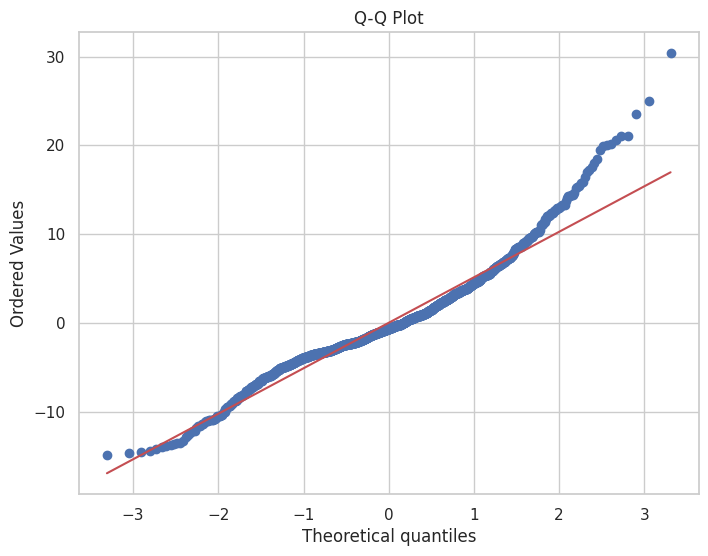

In [ ]:
# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(df['NewModel_residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

For larger observations the standard errors do not follow a normal distribution.

##### **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor                  features
0       51.35                 Intercept
1        1.00   EnvironmentSatisfaction
2        1.00           JobSatisfaction
3        1.00  RelationshipSatisfaction
4        1.00            JobInvolvement
5        1.00           WorkLifeBalance
6        1.00             MonthlyIncome


The output shows no multicollinearity, as all factors are below the treshold of 5

##### **Independence of Errors**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(df['NewModel_residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0025920072034453


The Durbin-Watson test yields a value that lies in the [1.5; 2.5]. Therefore, the assumption is fulfilled and we can assume independence of errors.

### **4.5 Results Analysis**

The initial regression model exhibited several issues that indicated it was not a suitable fit. Notably, the negative adjusted R-squared value suggested that the model was worse than a model with no predictors. Additionally, the low R-squared value demonstrated a very weak fit, and none of the predictor variables were statistically significant. These problems, along with the violation of underlying assumptions, pointed to the inadequacy of the initial model. Therefore, we **fail to reject the null hypothesis** that neither work-life balance, environment satisfaction, job satisfaction, job involvement and relationship satisfaction have no significant impact on the duration of an employee's tenure.

To make up for the omitted variable bias in the first model, *MonthlyIncome* was added as a predictor variable. The updated model showed a significant improvement, with the R-squared value increasing to 0.265 and the adjusted R-squared value to 0.262. The F-statistic indicated that the overall model was statistically significant, and MonthlyIncome emerged as a highly significant predictor of employee tenure. However, despite these improvements, the linearity assumption of the model is still not met.

Therefore, while the model has become better with the inclusion of MonthlyIncome, it still does not fully capture the complexity of the factors influencing employee tenure. We conclude that we fail to reject the null hypothesis. Future research should explore additional variables that may impact employee tenure, and possibly include interaction terms to capture more complex relationships between predictors. Additionally, future research might investigate non-parametric models that might better capture the relationship between these variables.

## **5. Method 2: Multiple Logistic Regression**

The second part of the research focuses on analyzing to what extent satisfaction factors influence the likelihood of an employee leaving the company. The dependent variable, *Attrition*, is binary. It's either 'yes' if the employee has left the company, and 'no', if the emplyee is still working at the company. Because we have a binary dependent variable and we are analysing the probability of an event occurring, the most appropriate method is a logistic regression. Moreover, having multiple variables as predictors, a **Multiple logistic regression** analysis will be performed.

Hence, this model estimates the likelihood of employee attrition (dependent variable) based on Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction (independent variables).

*The hypothesis are as follows:*

**H0₂**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have no significant effect on the likelihood of employee attrition.

**HA₂**: Work-life balance, work environment satisfaction, job satisfaction, job involvement and relationship satisfaction have a significant effect on the likelihood of employee attrition.


### **5.1 Model**

In [ ]:
# Transform attrition from string to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Create logistic regression model
logit_model = smf.logit('Attrition ~ EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + JobInvolvement + WorkLifeBalance', data=df).fit()

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.419245
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                 0.05083
Time:                        15:19:12   Log-Likelihood:                -616.29
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.944e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.0312      0.489      4.153      0.000       1.073

**Interpretation of coefficients**

The Multiple Logistic Regression table indicates that four out of the five independent variables significantly affect the probability of employee attrition. The p-values presented in the table are associated with the null hypothesis that the coefficient (β) equals zero. This means that if the p-value is low (typically less than 0.05), we reject the null hypothesis and conclude that the independent variable has a statistically significant effect on the dependent variable (attrition).

Furthermore, a significant coefficient suggests that when the independent variable increases by one unit, the odds of attrition change. This is reflected in the odds ratio: if the odds ratio is not equal to one, it indicates that the independent variable has an effect on the likelihood of attrition—either increasing or decreasing it, depending on whether the odds ratio is greater than or less than one.

*EnvironmentSatisfaction* presents a negative coefficient of -0.2616, with a p-value of 0.000. This means that Environment satisfaction has a negative influence on the likelihood of attrition of an employee. Similarly, *JobSatisfaction* and *JobInvolvement* have a coefficient of -0.2767 and -0.04990 respectively, both significant at the 95% confidence level (p=0.000). Therefore, both Job involvement and Job Satisfaction negatively affect the likelihoow of Attrition. Likewise, *WorkLifeBalance* also yields a negative coefficient with a p-value below the alpha level of 5% (0.013), meaning that it also negatively influences the likelihood of Attrition. On the other hand, *RelationshipSatisfaction* has a p-value of 0.131, hence, it does not have a significant impact on the likelihood of Attrition.


### **5.2 Interpretation**

#### **5.2.1 Goodness-of-fit**

**R-squared metrics**

In [ ]:
# McFadden's pseudo R-squared
mcfadden_r2 = 1 - (logit_model.llf / logit_model.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
n = len(df)  # number of observations
cox_snell_r2 = 1 - np.exp((logit_model.llnull - logit_model.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-logit_model.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.05082604307412575
Cox & Snell pseudo R-squared: 0.04390614635204659
Nagelkerke pseudo R-squared: -0.030939746149372463


**Interpretation**

Overall, the model presents rather low R-squared values, which means that its predictive capacity will be limited.

Firstly, McFadden's R-squared compares the likelihood of the fitted model to the likelihood of a null model. Hence, this model predicts 5.08% more than a null model, which is rather low.

Cox & Snell's pseudo R-squared also assesses the goodness-of-fit, but it is bounded by values less than 1. A value of 0.0439 indicates that the model explains 4.39% of the possible improvement in likelihood over the null model. This is also a relatively low value, suggesting limited explanatory power.

Nagelkerke's pseudo R-squared is an adjusted Cox & Snell's R-squared to make it range from 0 to 1. However, this model presents a negative value, which indicates potential issues with the model.


**Confusion Matrix**

In [ ]:
# First, make prediction for the null and logic model
# Predict using the null model (most frequent class)
most_frequent_class = df['Attrition'].mode()[0]

# Generate predictions for the null model
null_model_predictions = np.full_like(df['Attrition'], most_frequent_class)

# Predict probabilities using the logistic regression model
logit_predictions_prob = logit_model.predict()

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)

# Then,  print the matrix
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for the null model
null_conf_matrix = confusion_matrix(df['Attrition'], null_model_predictions)

# Confusion matrix for the logistic regression model
logit_conf_matrix = confusion_matrix(df['Attrition'], logit_predictions_class)

# Print the confusion matrices
print("Confusion Matrix for the Null Model:")
print(null_conf_matrix)

print("\nConfusion Matrix for the Logistic Regression Model:")
print(logit_conf_matrix)

Confusion Matrix for the Null Model:
[[1233    0]
 [ 237    0]]

Confusion Matrix for the Logistic Regression Model:
[[1231    2]
 [ 235    2]]


**Interpretation**

The confusion matrices corroborate the findings from the R-squared metrics analysis, indicating that the model's predictive ability is rater limited.

The null model is a model with no predictors that uses the overall proportion of the outcome in the dataset to predict. Because more than 50% of the dataset has an outcome of 1 (no attrition), the model predicts 1 for all observations. But because only 1233 of the 1470 observations actually have no attrition, the model only correctly predicts those as true positives. The rest 237 observations, which were predicted to be positive, fall into the category of false negatives.

The Confusion Matrix for the Logistic Regression Model is almost the same as the one of the null model, with the only difference that the model rightfully predicted 2 observations to be true negatives, but incorrectly predicted two observations as positive (false positives). Overall, the number of correctly predicted observations is the same (1233). This might be because the model is not balanced, as the number of observations that have a value of 0 (no attrition) in the dataset is far higher (n(0)=1233).

Even thouh the model's predictive ability is limited, it can still be used for hypothesis testing.



#### **5.2.2 Hypothesis testing**

In [ ]:
# INSTRUCTION: Compute the Odds ratio for all variables in the logistic regression model
# Get the odds ratios (exponentiated coefficients)
odds_ratios = pd.DataFrame({
    'Variable': logit_model.params.index,
    'Odds Ratio': np.exp(logit_model.params.values)
})
print(odds_ratios)

                   Variable  Odds Ratio
0                 Intercept        7.62
1   EnvironmentSatisfaction        0.77
2           JobSatisfaction        0.76
3  RelationshipSatisfaction        0.90
4            JobInvolvement        0.61
5           WorkLifeBalance        0.78


**Interpretation**

All independent variables are below 1, indicating that a one-unit increase in the predictor variable decreases the odds of the outcome. Specifically, for every unit increase in *EnvironmentSatisfaction*, the odds of the outcome occurring decrease by 23%. Similarly, an odds ratio of 0.76 for *JobSatisfaction* means that for each unit increase in Job Satisfaction, the odds of the outcome occurring decrease by 24%.

*JobInvolvement* and *WorkLifeBalance* have odds ratios of 0.61 and 0.72 respectively, meaning that a one-unit increase in the explanatory variable decreases the odds of attrition by 39% for *JobInvolvement* and 22% for *WorkLifeBalance*.

Finally, *RelationshipSatisfaction* yields the highest odds ratio (Exp(β) = 0.90)., which would indicate a smaller change in the odds of attrition with a one-unit increase in the variable. However, the logistic table shows that the β coefficient of the variable is not significantly different from 0. Hence, the 10% decrease could be due to random noise.

### **5.3. Results Analysis**

While our model has limited predictive abilities, it can be used for hypothesis testing. All independent variables but one (*RelationshipSatisfaction*) significanty decrease the odds of attrition of an employee. Therefore, we **reject the null hypothesis for four of the five independent variables**, i.e., *EnvironmentSatisfaction, JobSatisfaction, JobInvolvement, WorkLifeBalance* because they have significant effects on attrition. However, we **fail to reject the null hypothesis for *RelationshipSatisfaction***, meaning there is no significant evidence to suggest that it affects the odds of attrition.

## **6. Conclusion**

HR analytics uses organizational data to identify employee trends, enabling HR departments to make data-driven decisions that improve efficiency and profitability. The HR Employee Attrition dataset employed for this research, with 1,470 records and 35 variables, provides insights into personal and job-related factors influencing employee retention. While the dataset allows for an in-depth analysis of the link between job satisfaction and attrition, it may have limitations, such as biases in self-reported data and missing external factors affecting employee decisions.

This research sought to answer the following question: **How do employee satisfaction levels affect employee tenure and the likelihood of attrition?**

To address this, we employed two different models: a multiple linear regression model to examine the impact of satisfaction levels on employee tenure and a logistic regression model to assess how these factors influence the likelihood of attrition.
The initial multiple linear regression model examined the relationship between employee satisfaction measures (i.e.,  work-life balance, environment satisfaction, job satisfaction, job involvement, and relationship satisfaction) and employee tenure. The model showed substantial issues. The negative adjusted R-squared value indicated that the model performed worse than a model with no predictors, and none of the predictor variables were statistically significant. These findings, along with the violation of the linearity and normality of residuls assumptions, suggested that the model was not a good fit for explaining employee tenure based solely on satisfaction levels.
To address potential omitted variable bias, we included MonthlyIncome as an additional predictor. This improved the model, as evidenced by a substantial increase in the R-squared value to 0.265 and the adjusted R-squared to 0.262, indicating a better fit. Monthly income emerged as a highly significant predictor of tenure. However, despite this improvement, the model still failed to meet key assumptions, such as linearity, which implies that the relationship between satisfaction measures and tenure may be more complex than the model can capture.
As a result, we **fail to reject the null hypothesis** that satisfaction measures have no significant impact on employee tenure. While income emerged as an important factor, the satisfaction variables themselves did not explain a substantial variance in employee tenure, and the linear regression model proved insufficient for fully capturing this relationship. Future research should further explore this relationship using alternative models, such as non-parametric tests.

The second part of the analysis provided more robust results for understanding the relationship between satisfaction measures and the likelihood of attrition. The regression model showed that four out of the five satisfaction variables— *EnvironmentSatisfaction, JobSatisfaction, JobInvolvement,* and *WorkLifeBalance* —were statistically significant predictors, meaning that increases in these satisfaction metrics decreased the odds of an employee leaving the company.
However, *RelationshipSatisfaction* was not found to be a significant predictor of attrition. Therefore, while we **reject the null hypothesis for the four significant variables, we fail to reject the null hypothesis for *RelationshipSatisfaction***, suggesting that this factor may not significantly influence employee attrition in our dataset.

In conclusion, our findings indicate that employee satisfaction measures have a limited impact on employee outcomes, depending on the specific context. Satisfaction levels did not significantly predict the length of employee tenure, as shown by the multiple linear regression model. However, satisfaction measures—particularly related to environment satisfaction, job satisfaction, job involvement, and work-life balance—were significant predictors of the likelihood of attrition.
This suggests that while satisfaction may not be a strong determinant of how long an employee stays with the company, it plays a more critical role in predicting whether an employee is likely to leave.
Future research should explore additional factors, such as income, job performance, or external job market conditions, and consider more complex models (e.g., interaction terms or non-parametric models) to capture the intricate relationships between satisfaction and employee outcomes.


## **7. References**


Gupta, N. D., & Kristensen, N. (2008). Work environment satisfaction and employee health: panel evidence from Denmark, France and Spain, 1994-2001. The European journal of health economics : HEPAC : health economics in prevention and care, 9(1), 51–61. https://doi.org/10.1007/s10198-007-0037-6

Mueser, K., Becker, D., & Wolfe, R. (2001). Supported employment, job preferences, job tenure and satisfaction. Journal of Mental Health, 10, 411-417. https://doi.org/10.1080/09638230123337.

Irabor, I. E. & Okolie, U. C. (2019). "A Review of Employees' Job Satisfaction and Its Affect on Their Retention." Annals of Spiru Haret University. Economic Series, 19(2), 93-114